In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -q opendatasets
import os
import opendatasets as od


DATASET_PATH = od.download('https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small')


DATASET_PATH = './fashion-product-images-small'
print(os.listdir(DATASET_PATH))

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tawakalit
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small


100%|██████████| 565M/565M [00:02<00:00, 229MB/s]



['styles.csv', 'myntradataset', 'images']


In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Set the path to the dataset
directory_path = '/content/fashion-product-images-small'

df = pd.read_csv(os.path.join(directory_path, "styles.csv"), nrows=5000)

# Create a new column 'image' by concatenating 'id' with '.jpg'
df['image'] = df['id'].astype(str) + ".jpg"

# Reset the index of the DataFrame
df = df.reset_index(drop=True)
df.head(10)

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   
6  30805    Men        Apparel     Topwear       Shirts      Green  Summer   
7  26960  Women        Apparel     Topwear       Shirts     Purple  Summer   
8  29114    Men    Accessories       Socks        Socks  Navy Blue  Summer   
9  30039    Men    Accessories     Watches      Watches      Black  Winter   

   year   usage                             productDisplayName      image  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012  Casual                          Puma Men Grey T-shirt  53759.jpg  
5  2011  Casual           Inkfruit Mens Chain Reaction T-shirt   1855.jpg  
6  2012  Ethnic               Fabindia Men Striped Green Shirt  30805.jpg  
7  2012  Casual                  Jealous 21 Women Purple Shirt  26960.jpg  
8  2012  Casual                       Puma Men Pack of 3 Socks  29114.jpg  
9  2016  Casual                         Skagen Men Black Watch  30039.jpg

In [ ]:
df["masterCategory"].unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items'], dtype=object)

In [ ]:
images_dir = os.path.join(directory_path, 'images')
# Filter out rows where the image file does not exist
df['image_path'] = df['image'].apply(lambda x: os.path.join(images_dir, x))
df = df[df['image_path'].apply(os.path.exists)]

# Reset the index
df = df.reset_index(drop=True)
print(f"Total images: {len(df)}")

Total images: 5000


In [ ]:
from sklearn.model_selection import train_test_split

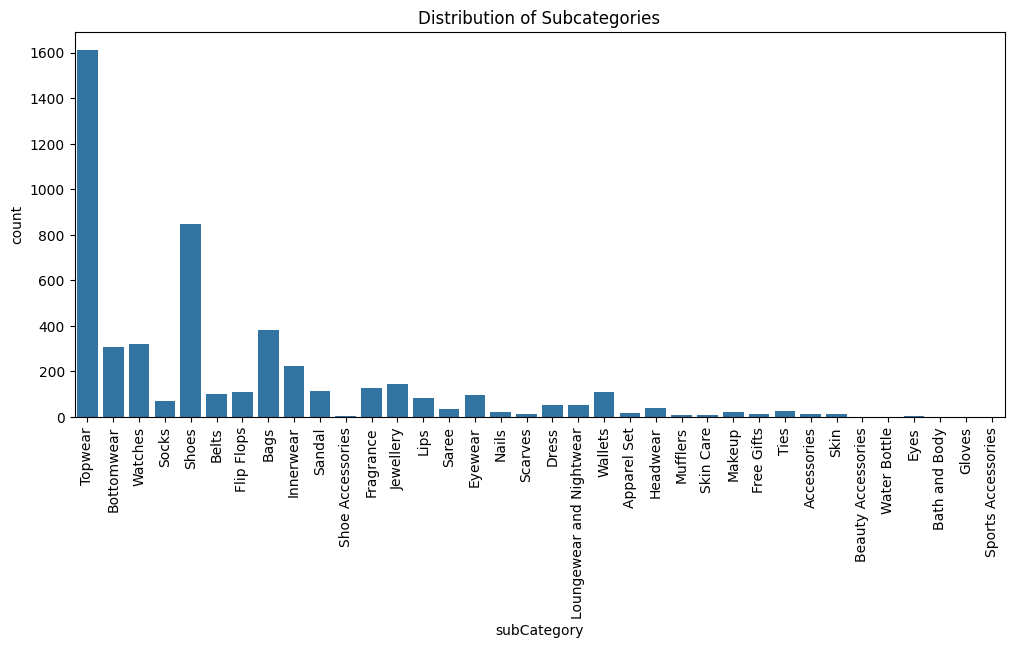

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of categories - helps in understanding class imbalances
plt.figure(figsize=(12, 5))
sns.countplot(x='subCategory', data=df)
plt.title('Distribution of Subcategories')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

print(f'Training images: {len(train_df)}')
print(f'Validation images: {len(val_df)}')
print(f'Test images: {len(test_df)}')

Training images: 3200
Validation images: 800
Test images: 1000


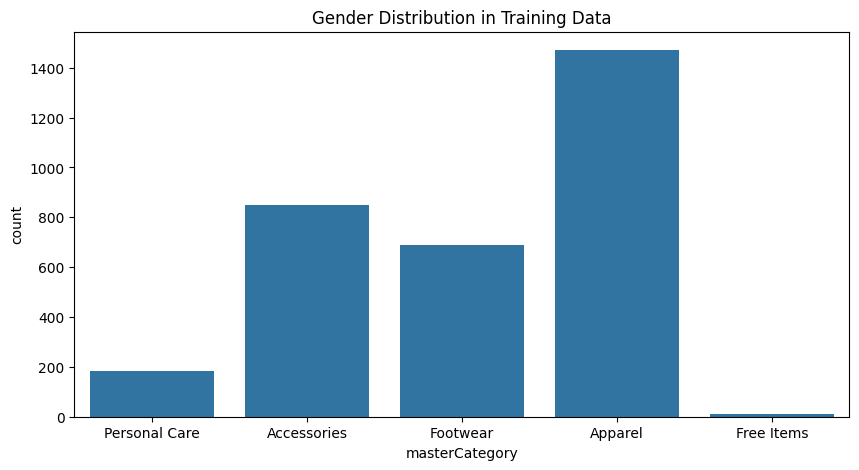

In [ ]:
# Analysis of the distribution of the 'gender' category within the training data
plt.figure(figsize=(10, 5))
sns.countplot(x='masterCategory', data=train_df)
plt.title('Gender Distribution in Training Data')
plt.show()

<ipython-input-14-c87ef4290e60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='masterCategory', data=train_df, palette='Set2')


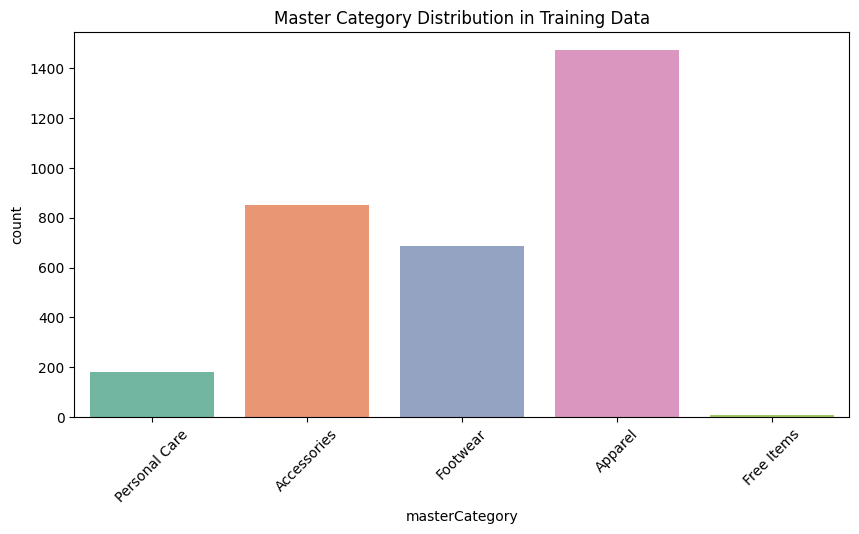

In [ ]:
# Analyze the distribution of 'masterCategory' within the training data
plt.figure(figsize=(10, 5))
sns.countplot(x='masterCategory', data=train_df, palette='Set2')
plt.title('Master Category Distribution in Training Data')
plt.xticks(rotation=45)
plt.show()

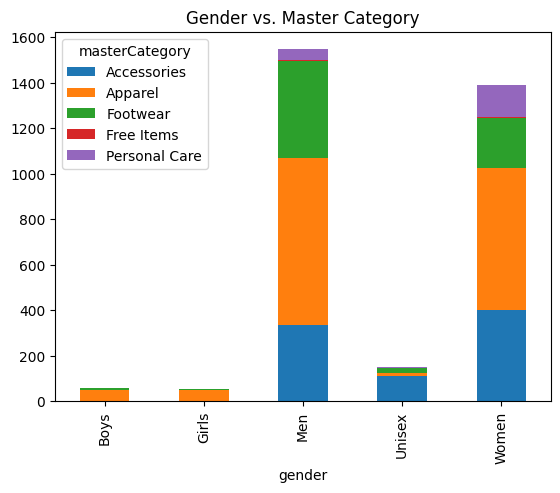

In [ ]:
# Cross-tabulation of Gender and Master Category
pd.crosstab(train_df['gender'], train_df['masterCategory']).plot(kind='bar', stacked=True)
plt.title('Gender vs. Master Category')
plt.show()

In [ ]:
# mapping between images and styles.csv
from multiprocessing import Pool

p = Pool(5)

image_name = []
for x in os.listdir(os.path.join(DATASET_PATH, 'images')):
  if os.path.isfile(os.path.join(DATASET_PATH, 'images', x)):
    image_path = os.path.join('images', x)
    image_name.append(os.path.basename(image_path))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
# convert list to integer
image_number = [i.split('.')[0] for i in image_name]
image_number = [int(i) for i in image_number]
image_number = pd.DataFrame(image_number, columns = ['id'])
image_number.head(3)

id
0  17848
1  38165
2  12602

In [ ]:
# Use pd.concat to concatenate the dataframes correctly
df_image = pd.concat([df, image_number], axis=1)
print('Inner joint styles and images dataframe size = {}'.format(df_image.shape))

Inner joint styles and images dataframe size = (44441, 13)


In [ ]:
master_cat_name = list(df_image.groupby(['masterCategory']).groups.keys())
master_cat_name

['Accessories', 'Apparel', 'Footwear', 'Free Items', 'Personal Care']

In [ ]:
# random select a image to show
sample_list = df_image.groupby(['masterCategory']).apply(lambda x: x.sample(n=5, replace=True))

samples = []
keys = []
for i in sample_list['id']:
    samples.append(i)

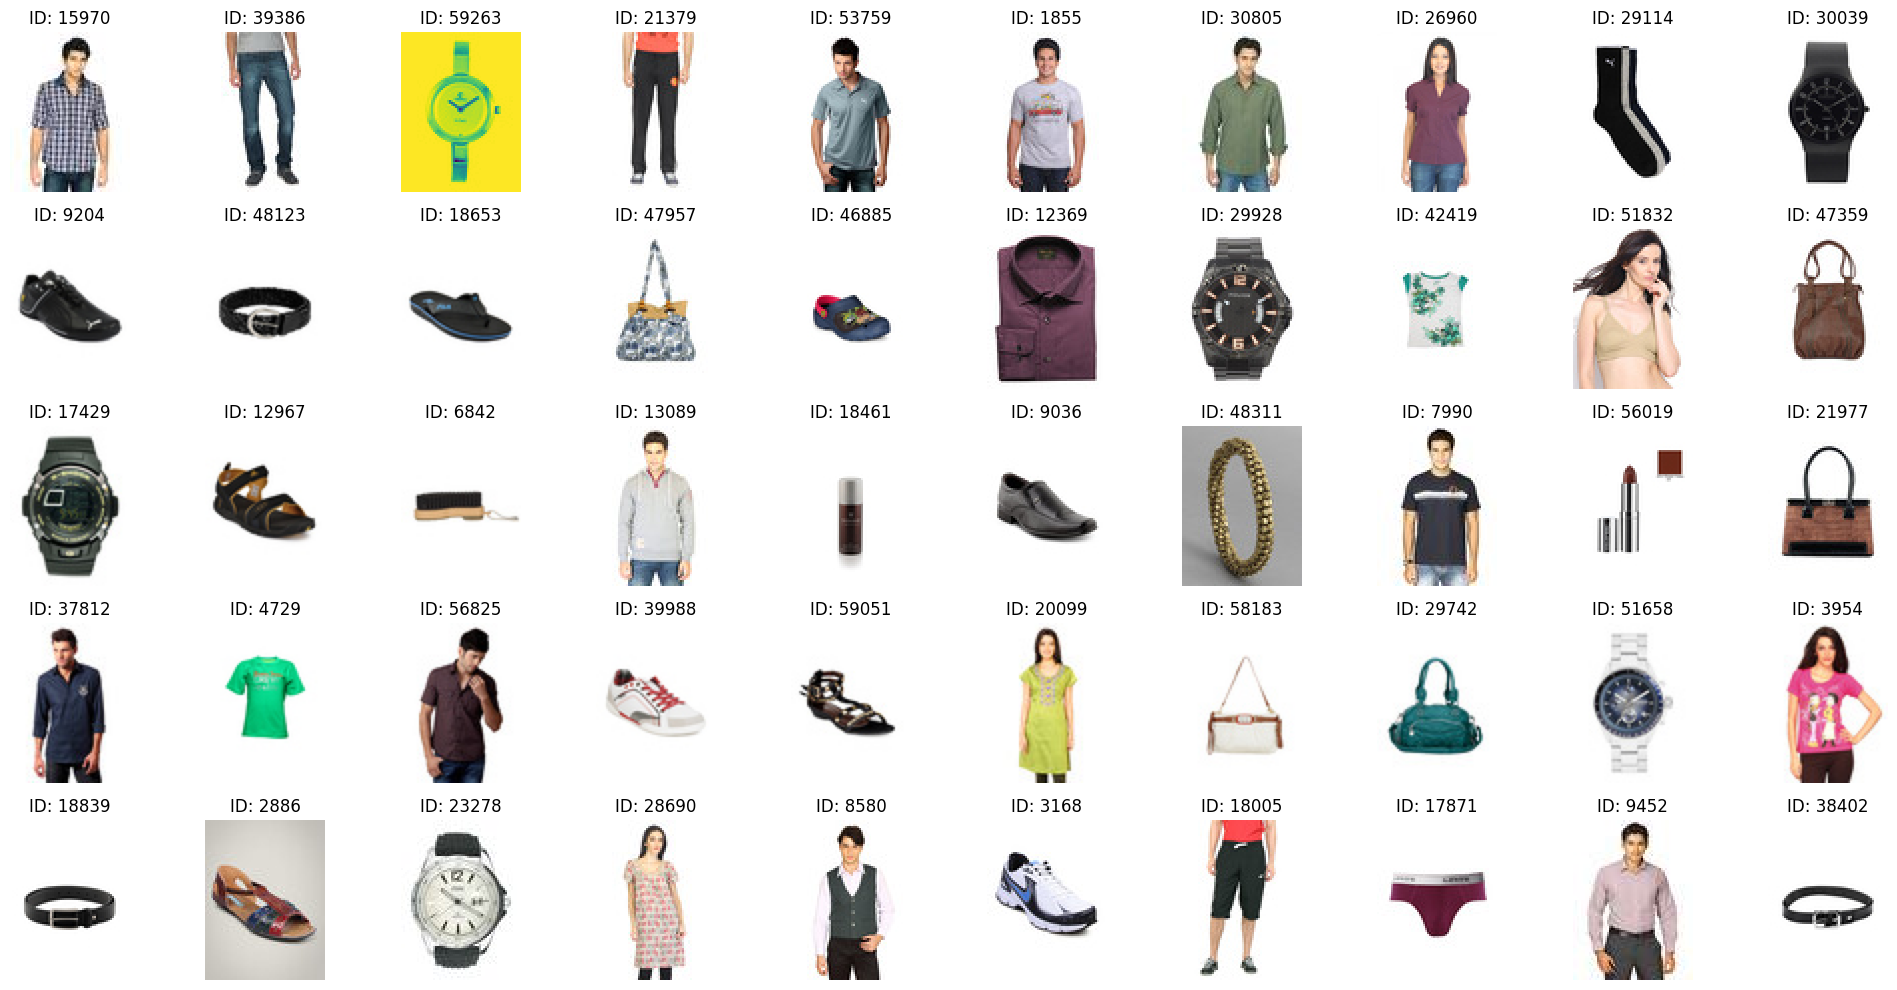

In [ ]:
import matplotlib.image as mpimg

def display_sample_images(data, number_of_images=50):
    columns = 10
    rows = (number_of_images + columns - 1) // columns

    fig = plt.figure(figsize=(20, 2 * rows))

    for i in range(1, number_of_images + 1):
        if i <= len(data):
            image_id = data.iloc[i-1]['id']
            image_path = os.path.join(DATASET_PATH, 'images', f"{image_id}.jpg")
            try:
                img = mpimg.imread(image_path)
                ax = fig.add_subplot(rows, columns, i)
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(f"ID: {image_id}")
            except FileNotFoundError:
                print(f"Image file not found: {image_path}")
        else:
            break
    plt.tight_layout()
    plt.show()

display_sample_images(df)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generators for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create data generators for training, validation, and test sets
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='masterCategory',  # Change this to the appropriate column for classification
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='masterCategory',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='masterCategory',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3200 validated image filenames belonging to 5 classes.
Found 800 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generators for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training, validation, and test sets
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='masterCategory',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='masterCategory',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='masterCategory',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Number of classes
num_classes = len(train_generator.class_indices)

Found 3200 validated image filenames belonging to 5 classes.
Found 800 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Load VGG19 model with pre-trained ImageNet weights
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers
x = vgg_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
vgg_model = Model(inputs=vgg_base.input, outputs=predictions)

# Freeze the base VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Compile the model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Train VGG19 model
vgg_history = vgg_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/25
100/100 [==============================] - 47s 370ms/step - loss: 1.2722 - accuracy: 0.7675 - val_loss: 0.2674 - val_accuracy: 0.9162
Epoch 2/25
100/100 [==============================] - 37s 369ms/step - loss: 0.3371 - accuracy: 0.8772 - val_loss: 0.2304 - val_accuracy: 0.9425
Epoch 3/25
100/100 [==============================] - 37s 372ms/step - loss: 0.2924 - accuracy: 0.8947 - val_loss: 0.2394 - val_accuracy: 0.9300
Epoch 4/25
100/100 [==============================] - 37s 366ms/step - loss: 0.2988 - accuracy: 0.8928 - val_loss: 0.2117 - val_accuracy: 0.9450
Epoch 5/25
100/100 [==============================] - 37s 364ms/step - loss: 0.2762 - accuracy: 0.8981 - val_loss: 0.2208 - val_accuracy: 0.9350
Epoch 6/25
100/100 [==============================] - 37s 370ms/step - loss: 0.2859 - accuracy: 0.8981 - val_loss: 0.2193 - val_accuracy: 0.9575
Epoch 7/25
100/100 [==============================] - 37s 364ms/step - loss: 0.2655 - accuracy: 0.9116 - val_loss: 0.2257 - val_ac

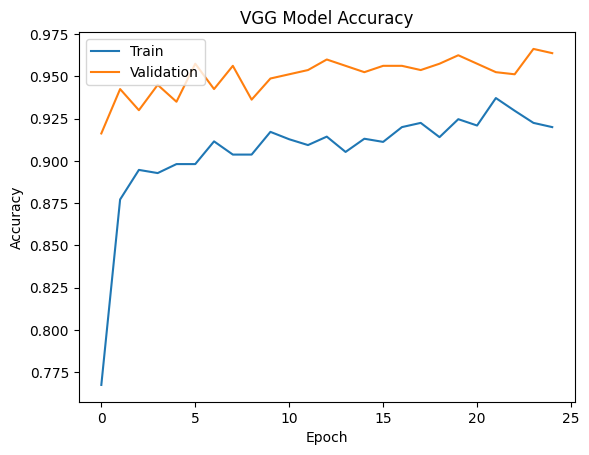

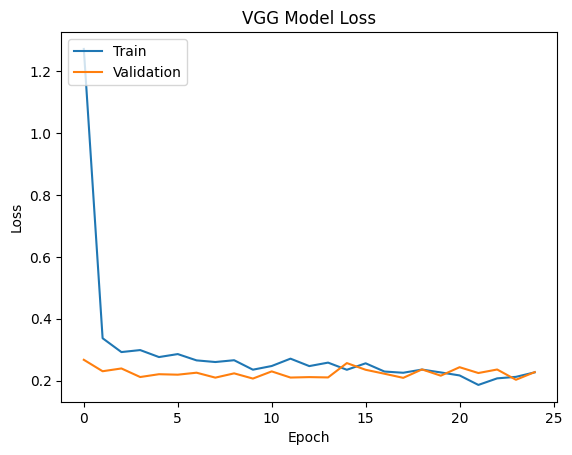

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.title('VGG Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('VGG Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate VGG19 model on the test set
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_generator, steps=len(test_generator))
print(f'VGG19 Test Accuracy: {vgg_test_acc:.4f}')

32/32 [==============================] - 7s 219ms/step - loss: 0.1231 - accuracy: 0.9620
VGG19 Test Accuracy: 0.9620


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict using VGG19 model
vgg_predictions = vgg_model.predict(test_generator, steps=len(test_generator))
vgg_predicted_classes = np.argmax(vgg_predictions, axis=1)

# Classification report for VGG19
vgg_class_report = classification_report(test_generator.classes, vgg_predicted_classes, target_names=list(train_generator.class_indices.keys()))
print("VGG19 Classification Report:\n", vgg_class_report)

32/32 [==============================] - 5s 150ms/step
VGG19 Classification Report:
                precision    recall  f1-score   support

  Accessories       0.93      0.95      0.94       273
      Apparel       0.98      0.97      0.98       452
     Footwear       0.99      1.00      0.99       209
   Free Items       0.00      0.00      0.00         3
Personal Care       0.89      0.90      0.90        63

     accuracy                           0.96      1000
    macro avg       0.76      0.76      0.76      1000
 weighted avg       0.96      0.96      0.96      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


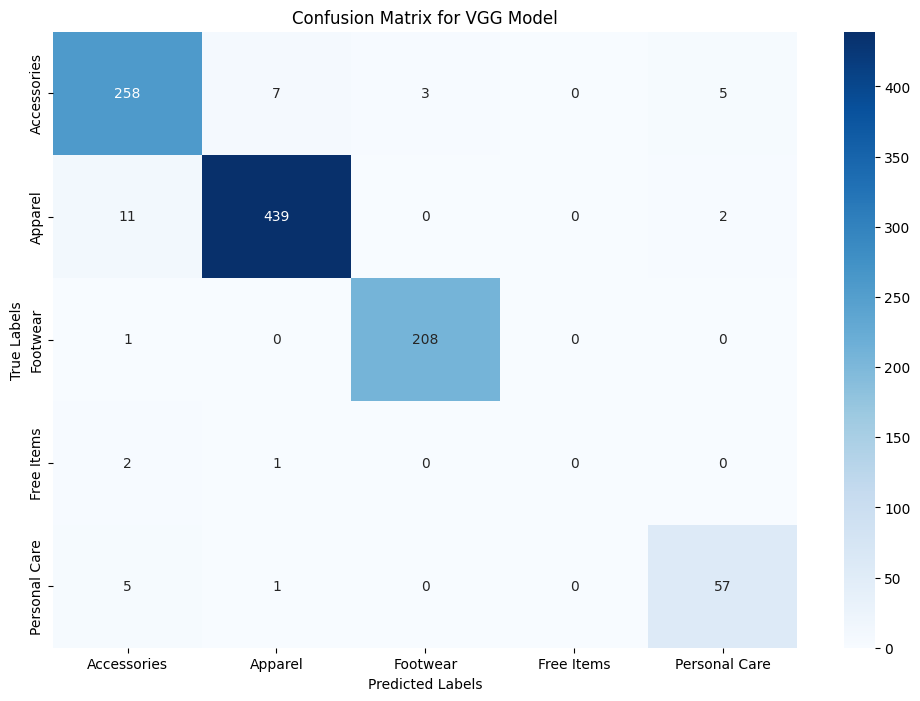

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix_vgg = confusion_matrix(test_generator.classes, vgg_predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_vgg, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for VGG Model')
plt.show()

32/32 [==============================] - 5s 156ms/step


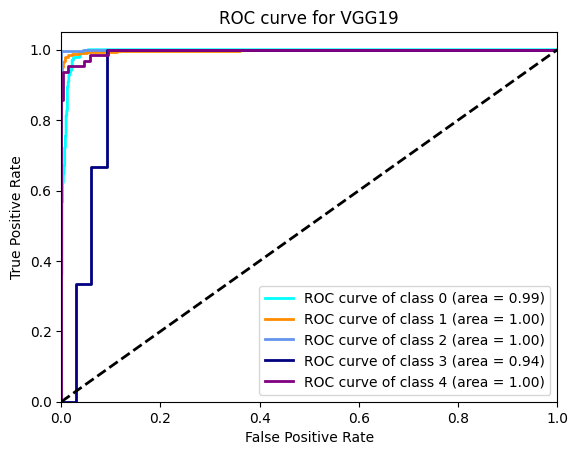

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Binarize the true labels for ROC curve
y_true_bin = label_binarize(test_generator.classes, classes=[0, 1, 2, 3, 4])
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
vgg_predictions = vgg_model.predict(test_generator, steps=len(test_generator))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], vgg_predictions[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], vgg_predictions[:, i])

# Plot ROC curve
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'navy', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for VGG19')
plt.legend(loc="lower right")
plt.show()

Hyperparameter Tuning Using Grid Search for VGG

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV

def create_vgg_model(learning_rate=0.001, dropout_rate=0.5, optimizer='adam'):
    vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in vgg_base.layers:
        layer.trainable = False

    x = Flatten()(vgg_base.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=vgg_base.input, outputs=predictions)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier wrapper
model = KerasClassifier(build_fn=create_vgg_model, verbose=1)

# Define the grid of hyperparameters
param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 25],
    'learning_rate': [0.001, 0.0001],
    'dropout_rate': [0.3, 0.5],
    'optimizer': ['adam', 'rmsprop']
}

# Set up the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Execute the grid search
grid_result = grid.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

# Display the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"{mean:.4f} (+/-{std:.4f}) with: {param}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Predict the probabilities for the test set
vgg_probabilities = vgg_model.predict(test_generator)

# Convert probabilities to predicted class labels
vgg_predicted_classes = np.argmax(vgg_probabilities, axis=1)

# Get the true class labels from the test generator
true_classes = test_generator.classes

# Compute the confusion matrix
conf_matrix_vgg = confusion_matrix(true_classes, vgg_predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_vgg, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for VGG Model')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a custom CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
# Train CNN model
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/25
100/100 [==============================] - 37s 330ms/step - loss: 1.1880 - accuracy: 0.5547 - val_loss: 0.6976 - val_accuracy: 0.7337
Epoch 2/25
100/100 [==============================] - 33s 331ms/step - loss: 0.7589 - accuracy: 0.6719 - val_loss: 0.6158 - val_accuracy: 0.7788
Epoch 3/25
100/100 [==============================] - 34s 336ms/step - loss: 0.6748 - accuracy: 0.7284 - val_loss: 0.5640 - val_accuracy: 0.8100
Epoch 4/25
100/100 [==============================] - 33s 329ms/step - loss: 0.6473 - accuracy: 0.7400 - val_loss: 0.5508 - val_accuracy: 0.8025
Epoch 5/25
100/100 [==============================] - 33s 332ms/step - loss: 0.5754 - accuracy: 0.7772 - val_loss: 0.5115 - val_accuracy: 0.8275
Epoch 6/25
100/100 [==============================] - 33s 333ms/step - loss: 0.5344 - accuracy: 0.7816 - val_loss: 0.4672 - val_accuracy: 0.8288
Epoch 7/25
100/100 [==============================] - 33s 332ms/step - loss: 0.5143 - accuracy: 0.7997 - val_loss: 0.5014 - val_ac

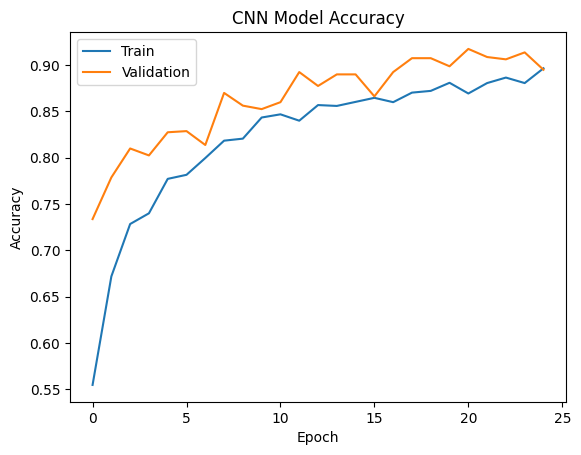

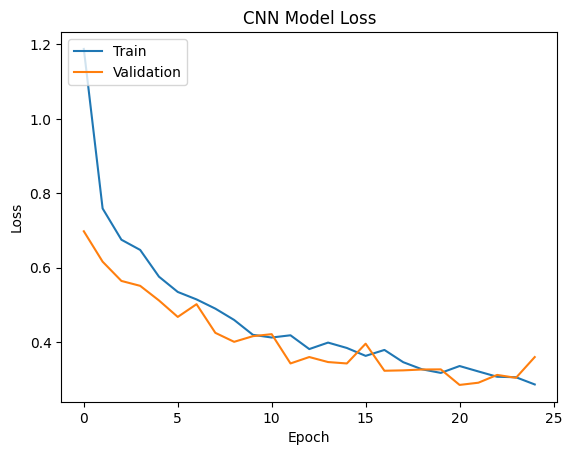

In [ ]:
# Plot training & validation accuracy values
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_generator, steps=len(test_generator))
print(f'CNN Test Accuracy: {cnn_test_acc:.4f}')

32/32 [==============================] - 2s 46ms/step - loss: 0.3297 - accuracy: 0.8850
CNN Test Accuracy: 0.8850


In [ ]:
# Predict using CNN model
cnn_predictions = cnn_model.predict(test_generator, steps=len(test_generator))
cnn_predicted_classes = np.argmax(cnn_predictions, axis=1)

# Classification report for CNN
cnn_class_report = classification_report(test_generator.classes, cnn_predicted_classes, target_names=list(train_generator.class_indices.keys()))
print("CNN Classification Report:\n", cnn_class_report)

32/32 [==============================] - 1s 33ms/step
CNN Classification Report:
                precision    recall  f1-score   support

  Accessories       0.79      0.85      0.82       273
      Apparel       0.96      0.91      0.93       452
     Footwear       0.97      0.92      0.95       209
   Free Items       0.00      0.00      0.00         3
Personal Care       0.61      0.78      0.69        63

     accuracy                           0.89      1000
    macro avg       0.67      0.69      0.68      1000
 weighted avg       0.89      0.89      0.89      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 1s 32ms/step


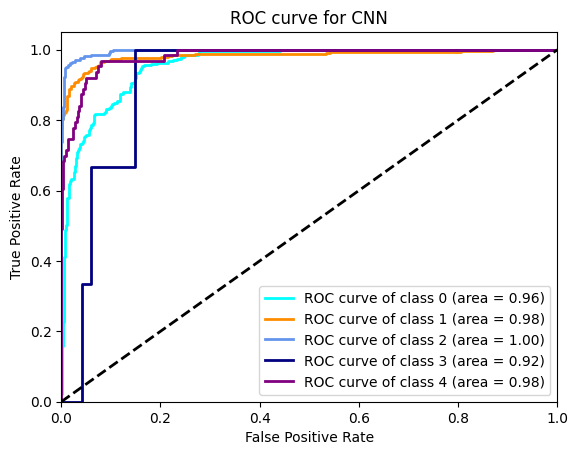

In [ ]:
cnn_predictions = cnn_model.predict(test_generator, steps=len(test_generator))

# Binarize the true labels for ROC curve
y_true_bin_cnn = label_binarize(test_generator.classes, classes=[0, 1, 2, 3, 4])
n_classes_cnn = y_true_bin_cnn.shape[1]

# Compute ROC curve and ROC area for each class
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()

for i in range(n_classes_cnn):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_true_bin_cnn[:, i], cnn_predictions[:, i])
    roc_auc_cnn[i] = roc_auc_score(y_true_bin_cnn[:, i], cnn_predictions[:, i])

# Plot ROC curve
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'navy', 'purple']
for i, color in zip(range(n_classes_cnn), colors):
    plt.plot(fpr_cnn[i], tpr_cnn[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_cnn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for CNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Load ResNet50 model, pretrained on ImageNet
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = Flatten()(resnet_base.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(df['masterCategory'].unique()), activation='softmax')(x)

# Create the new model
resnet_autoencoder = Model(inputs=resnet_base.input, outputs=output_layer)

# Compile the model
resnet_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
resnet_autoencoder.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_and_preprocess_image(file_path, target_size=(224, 224)):
    img = load_img(file_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

train_autoencoder_data = np.array([load_and_preprocess_image(file) for file in train_df['image_path']])
val_autoencoder_data = np.array([load_and_preprocess_image(file) for file in val_df['image_path']])

print(f"Train data shape: {train_autoencoder_data.shape}")
print(f"Validation data shape: {val_autoencoder_data.shape}")

Train data shape: (3200, 224, 224, 3)
Validation data shape: (800, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

# Load ResNet50 model, pretrained on ImageNet
input_shape = (224, 224, 3)
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

# Freeze the layers of the base model
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = Flatten()(resnet_base.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(np.prod(input_shape), activation='sigmoid')(x)  # Flatten the output
output_layer = tf.reshape(output_layer, (-1, *input_shape))  # Reshape the output back to the image shape

# Create the new model
resnet_autoencoder = Model(inputs=resnet_base.input, outputs=output_layer)

# Compile the model
resnet_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Display the model's architecture
resnet_autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# Train ResNet autoencoder
resnet_autoencoder_history = resnet_autoencoder.fit(
    train_autoencoder_data, train_autoencoder_data,  # Using input data as target as well for autoencoder
    epochs=25,
    batch_size=batch_size,
    validation_data=(val_autoencoder_data, val_autoencoder_data)
)

# Save the model
resnet_autoencoder.save('resnet_autoencoder_model.h5')

Epoch 1/25
100/100 [==============================] - 24s 186ms/step - loss: 0.0604 - val_loss: 0.0438
Epoch 2/25
100/100 [==============================] - 16s 156ms/step - loss: 0.0453 - val_loss: 0.0398
Epoch 3/25
100/100 [==============================] - 15s 153ms/step - loss: 0.0422 - val_loss: 0.0355
Epoch 4/25
100/100 [==============================] - 15s 153ms/step - loss: 0.0411 - val_loss: 0.0365
Epoch 5/25
100/100 [==============================] - 15s 154ms/step - loss: 0.0413 - val_loss: 0.0351
Epoch 6/25
100/100 [==============================] - 15s 154ms/step - loss: 0.0405 - val_loss: 0.0342
Epoch 7/25
100/100 [==============================] - 15s 155ms/step - loss: 0.0400 - val_loss: 0.0347
Epoch 8/25
100/100 [==============================] - 15s 155ms/step - loss: 0.0392 - val_loss: 0.0322
Epoch 9/25
100/100 [==============================] - 15s 153ms/step - loss: 0.0390 - val_loss: 0.0325
Epoch 10/25
100/100 [==============================] - 15s 153ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


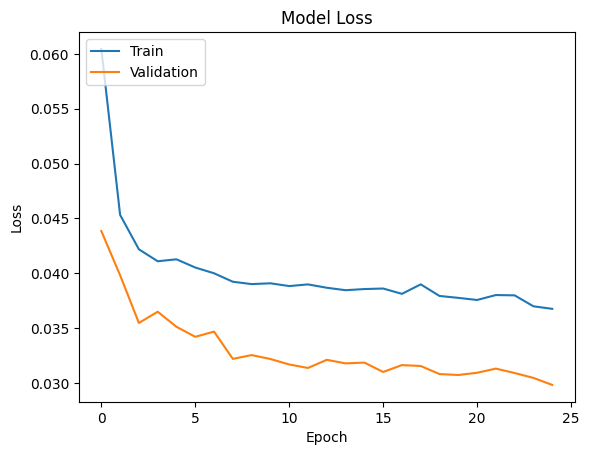

In [ ]:
from tensorflow.keras.metrics import MeanAbsoluteError

# Plot training & validation loss values
plt.plot(resnet_autoencoder_history.history['loss'])
plt.plot(resnet_autoencoder_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage.metrics import structural_similarity as ssim


# Load some test images
def load_and_preprocess_image(file_path, target_size=(224, 224)):
    img = load_img(file_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0
    return img

test_images = np.array([load_and_preprocess_image(file) for file in test_df['image_path']])

# Reconstruct images using the autoencoder
reconstructed_images = resnet_autoencoder.predict(test_images)

# Function to calculate PSNR
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# Calculate evaluation metrics
mse = np.mean(np.square(test_images - reconstructed_images))
mae = np.mean(np.abs(test_images - reconstructed_images))
psnr_values = [calculate_psnr(test_images[i], reconstructed_images[i]) for i in range(len(test_images))]
avg_psnr = np.mean(psnr_values)
ssim_values = [ssim(test_images[i], reconstructed_images[i], multichannel=True) for i in range(len(test_images))]
avg_ssim = np.mean(ssim_values)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Average PSNR: {avg_psnr:.2f} dB")
print(f"Average SSIM: {avg_ssim:.4f}")

32/32 [==============================] - 5s 126ms/step


<ipython-input-33-735490b2afaa>:31: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values = [ssim(test_images[i], reconstructed_images[i], multichannel=True) for i in range(len(test_images))]


Mean Squared Error (MSE): 0.0309
Mean Absolute Error (MAE): 0.0959
Average PSNR: 15.90 dB
Average SSIM: 0.7742


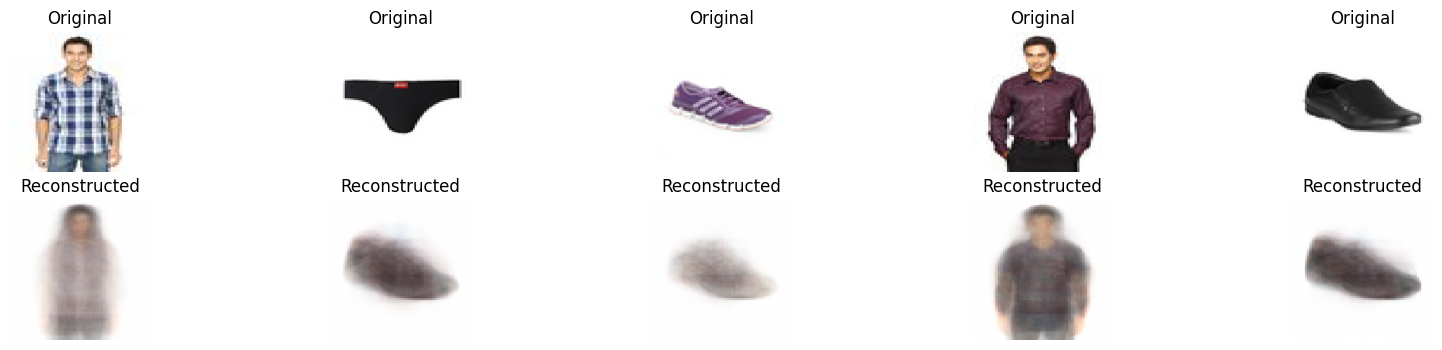

In [ ]:
# Visualize original vs. reconstructed images
n = 5  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i])
    plt.title("Original")
    plt.axis("off")

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

In [ ]:
# Image dimensions
img_width, img_height = 224, 224

# Load and preprocess image function
def load_and_preprocess_image(file_path, target_size=(224, 224)):
    img = load_img(file_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Load data
train_autoencoder_data = np.array([load_and_preprocess_image(file) for file in train_df['image_path']])
val_autoencoder_data = np.array([load_and_preprocess_image(file) for file in val_df['image_path']])

print(f"Train data shape: {train_autoencoder_data.shape}")
print(f"Validation data shape: {val_autoencoder_data.shape}")

Train data shape: (3200, 224, 224, 3)
Validation data shape: (800, 224, 224, 3)


In [ ]:
# Image dimensions
img_width, img_height = 224, 224

# Load and preprocess image function
def load_and_preprocess_image(file_path, target_size=(224, 224)):
    img = load_img(file_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Define a data generator
def data_generator(file_paths, batch_size, target_size=(224, 224)):
    while True:
        for start in range(0, len(file_paths), batch_size):
            end = min(start + batch_size, len(file_paths))
            batch_files = file_paths[start:end]
            batch_images = [load_and_preprocess_image(file, target_size) for file in batch_files]
            yield np.array(batch_images), np.array(batch_images)

train_files = train_df['image_path'].values
val_files = val_df['image_path'].values

batch_size = 8

train_gen = data_generator(train_files, batch_size)
val_gen = data_generator(val_files, batch_size)

steps_per_epoch = len(train_files) // batch_size
validation_steps = len(val_files) // batch_size

print(f"Train data shape: {train_autoencoder_data.shape}")
print(f"Validation data shape: {val_autoencoder_data.shape}")

Train data shape: (3200, 224, 224, 3)
Validation data shape: (800, 224, 224, 3)


In [ ]:
# CNN Autoencoder for Visual Search
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, Reshape, Input, UpSampling2D

input_img = Input(shape=(img_width, img_height, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)
cnn_autoencoder = Model(inputs=input_img, outputs=decoded)
cnn_autoencoder.compile(optimizer='adam', loss='mse')

cnn_autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       7385

In [ ]:
cnn_autoencoder_history = cnn_autoencoder.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=val_gen,
    validation_steps=validation_steps
)

Epoch 1/25
400/400 [==============================] - 14s 28ms/step - loss: 0.0083 - val_loss: 0.0023
Epoch 2/25
400/400 [==============================] - 11s 27ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 3/25
400/400 [==============================] - 11s 27ms/step - loss: 0.0298 - val_loss: 0.0062
Epoch 4/25
400/400 [==============================] - 11s 26ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 5/25
400/400 [==============================] - 10s 26ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 6/25
400/400 [==============================] - 10s 26ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/25
400/400 [==============================] - 11s 26ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/25
400/400 [==============================] - 11s 26ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/25
400/400 [==============================] - 11s 27ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/25
400/400 [==============================] - 11s 27ms/step - loss: 0.001

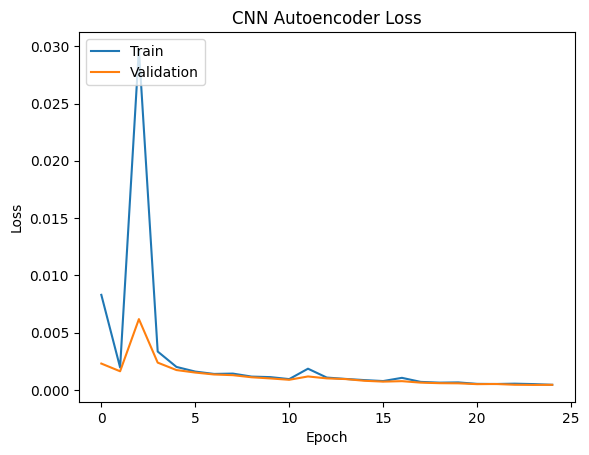

In [ ]:
# Plot autoencoder loss
plt.plot(cnn_autoencoder_history.history['loss'])
plt.plot(cnn_autoencoder_history.history['val_loss'])
plt.title('CNN Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess image
def load_and_preprocess_image(file_path, target_size=(224, 224)):
    img = load_img(file_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Function to visualize predictions
def visualize_predictions(model, dataframe, num_images=5):
    plt.figure(figsize=(15, 10))
    sample_data = dataframe.sample(n=num_images).reset_index()

    class_indices = list(train_generator.class_indices.keys())

    for i in range(num_images):
        file_path = sample_data['image_path'][i]
        true_label = sample_data['masterCategory'][i]

        img = load_and_preprocess_image(file_path)
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        prediction = model.predict(img)
        predicted_label = class_indices[np.argmax(prediction)]

        plt.subplot(2, num_images, i+1)
        plt.imshow(load_img(file_path))
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

VGG19 Model Predictions:
1/1 [==============================] - 0s 18ms/step


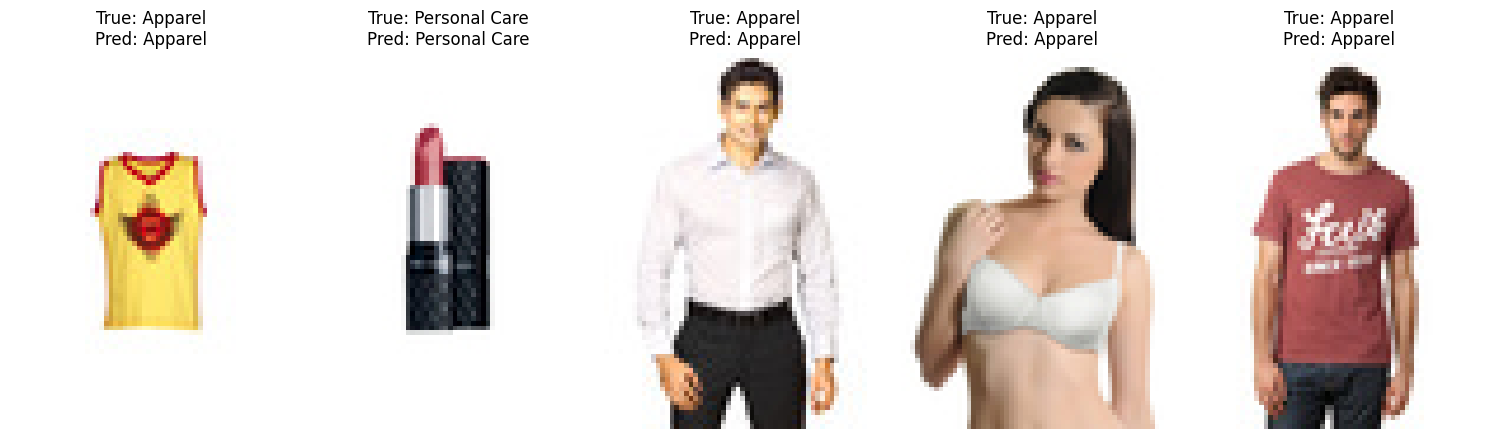

In [ ]:
# Visualize predictions for VGG19 model
print("VGG19 Model Predictions:")
visualize_predictions(vgg_model, test_df, num_images=5)

Custom CNN Model Predictions:
1/1 [==============================] - 0s 32ms/step


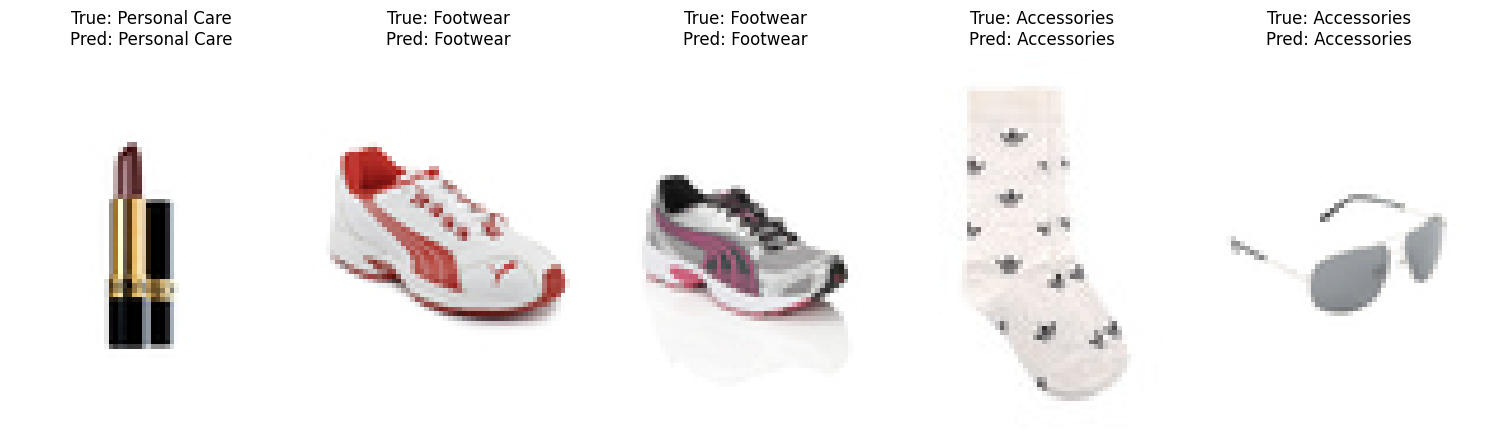

In [ ]:
# Visualize predictions for Custom CNN model
print("Custom CNN Model Predictions:")
visualize_predictions(cnn_model, test_df, num_images=5)

In [ ]:
# Visualize predictions for CNN Autoencoder model
# Autoencoders typically do not predict labels directly, but we can visualize the reconstructed images
def visualize_autoencoder_predictions(model, dataframe, num_images=5):
    plt.figure(figsize=(15, 10))
    sample_data = dataframe.sample(n=num_images).reset_index()

    for i in range(num_images):
        file_path = sample_data['image_path'][i]

        img = load_and_preprocess_image(file_path)
        img = np.expand_dims(img, axis=0)
        reconstructed_img = model.predict(img)

        plt.subplot(3, num_images, i+1)
        plt.imshow(load_img(file_path))
        plt.title("Original")
        plt.axis('off')

        plt.subplot(3, num_images, num_images+i+1)
        plt.imshow(reconstructed_img.squeeze())
        plt.title("Reconstructed")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

CNN Autoencoder Model Predictions:
1/1 [==============================] - 0s 18ms/step


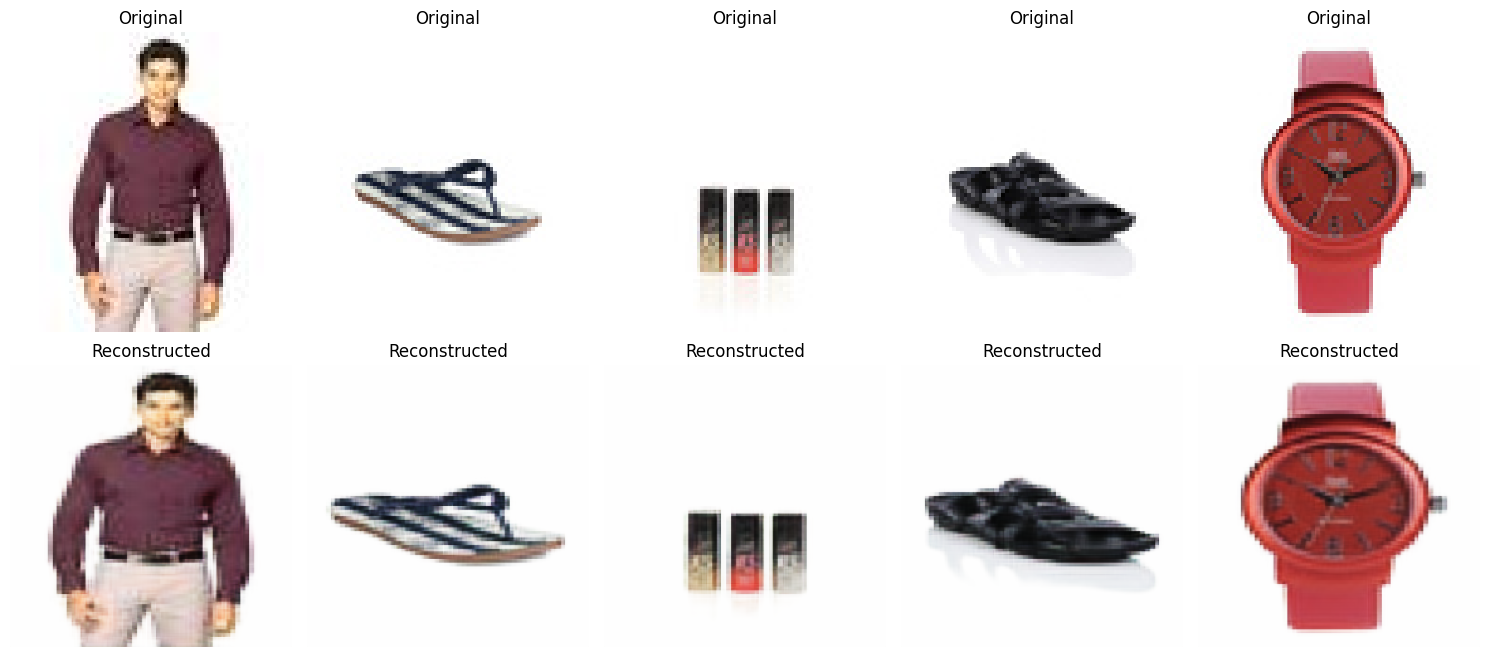

In [ ]:
# Visualize predictions for CNN Autoencoder model
print("CNN Autoencoder Model Predictions:")
visualize_autoencoder_predictions(cnn_autoencoder, test_df, num_images=5)

In [ ]:
# Function to load and preprocess image
def load_and_preprocess_image(file_path, target_size=(224, 224)):
    img = load_img(file_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Function to visualize predictions
def visualize_predictions(model, dataframe, num_images=5):
    plt.figure(figsize=(15, 10))
    sample_data = dataframe.sample(n=num_images).reset_index()

    class_indices = list(train_generator.class_indices.keys())

    for i in range(num_images):
        file_path = sample_data['image_path'][i]
        true_label = sample_data['masterCategory'][i]

        img = load_and_preprocess_image(file_path)
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        prediction = model.predict(img)
        predicted_label = class_indices[np.argmax(prediction)]

        plt.subplot(2, num_images, i+1)
        plt.imshow(load_img(file_path))
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

VGG19 Model Predictions:
1/1 [==============================] - 0s 24ms/step


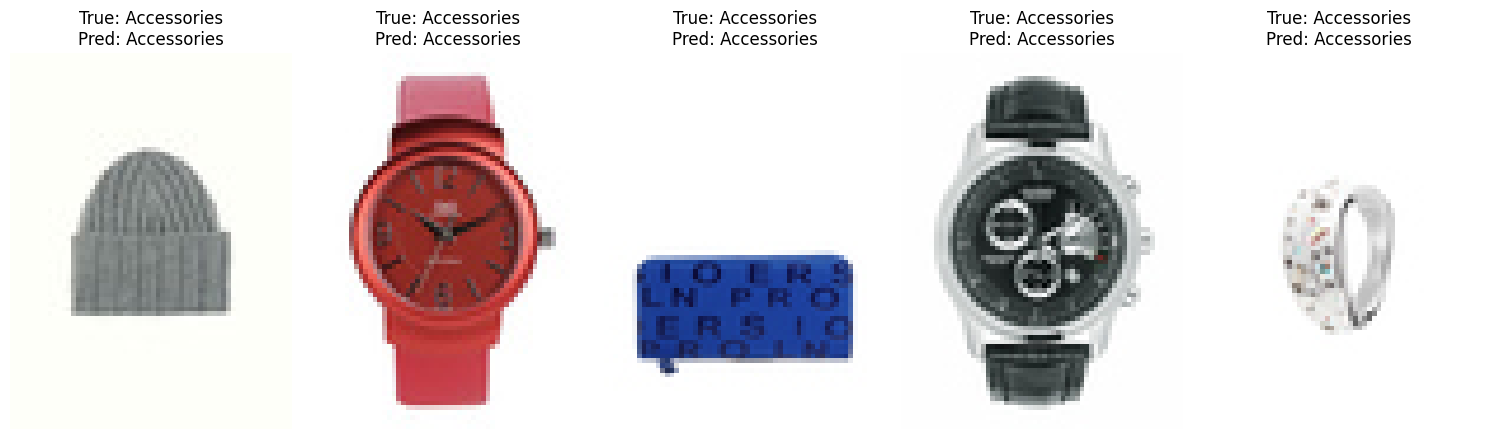

In [ ]:
# Visualize predictions for VGG19 model
print("VGG19 Model Predictions:")
visualize_predictions(vgg_model, test_df, num_images=5)


Custom CNN Model Predictions:
1/1 [==============================] - 0s 25ms/step


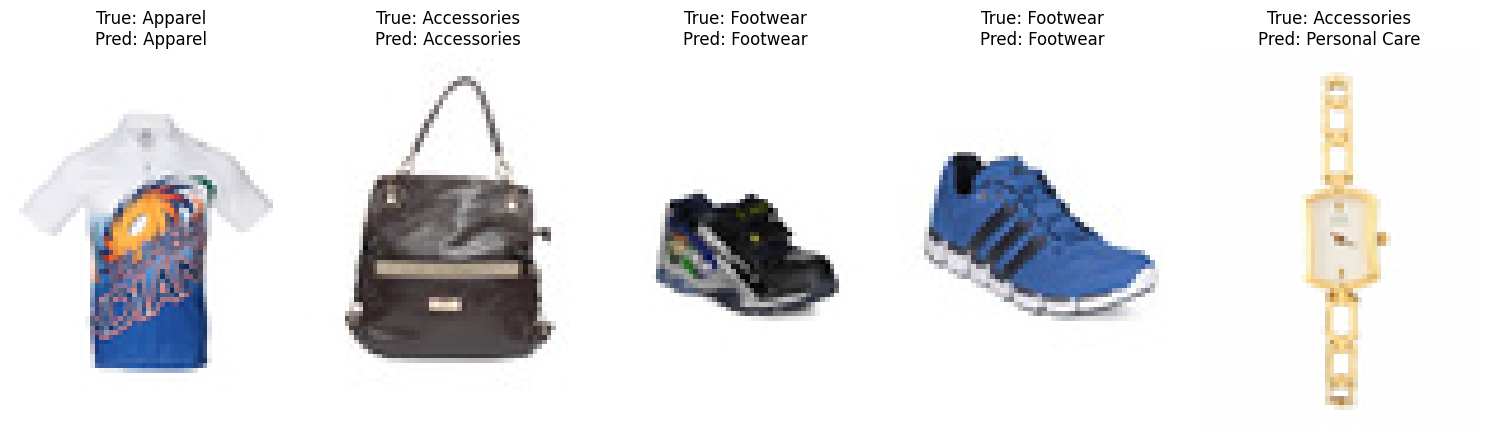

In [ ]:
# Visualize predictions for Custom CNN model
print("Custom CNN Model Predictions:")
visualize_predictions(cnn_model, test_df, num_images=5)

CNN Autoencoder Model Predictions:
1/1 [==============================] - 0s 20ms/step


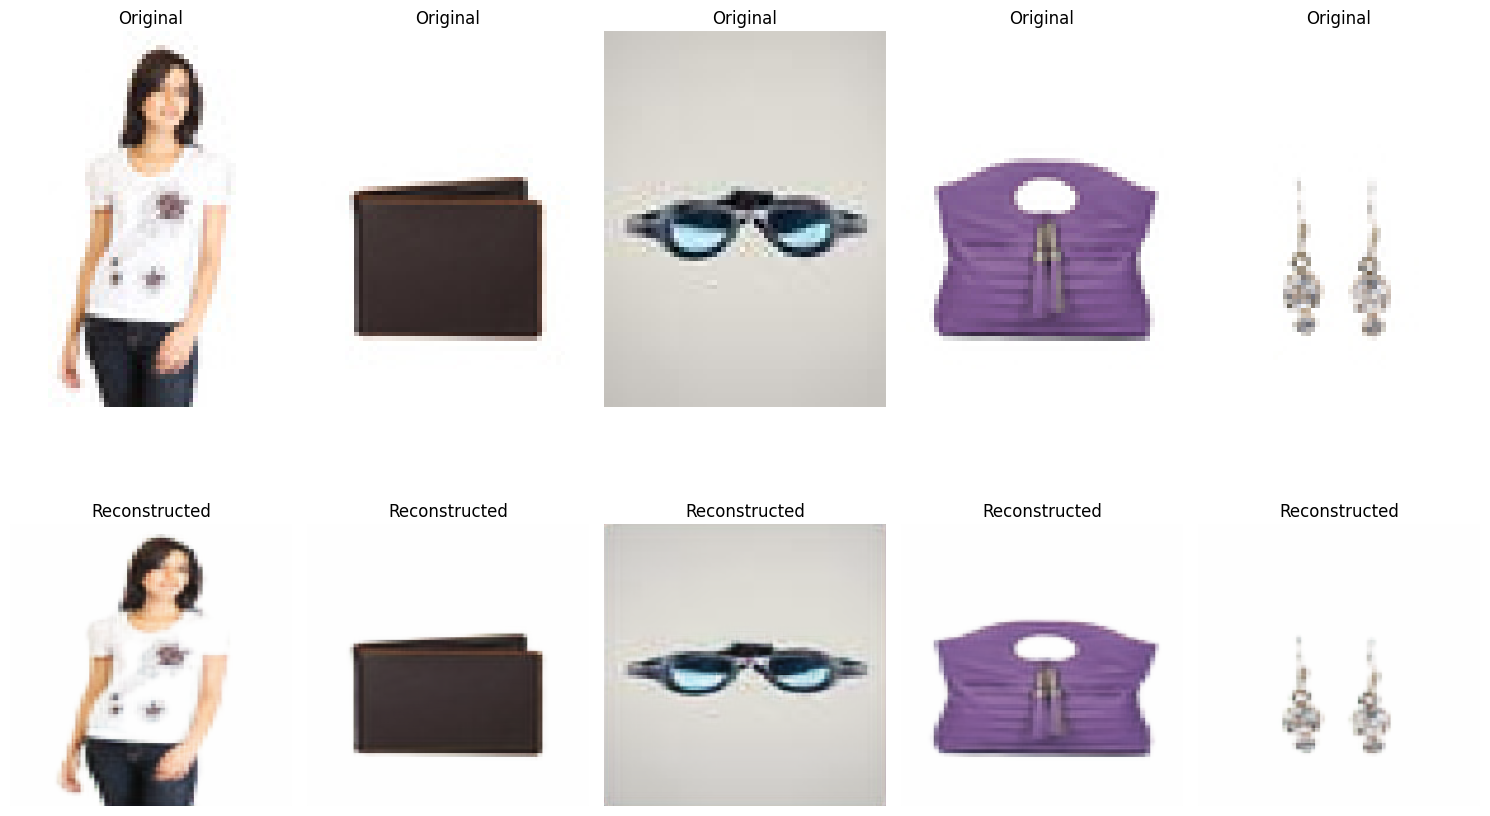

In [ ]:
# Visualize predictions for CNN Autoencoder model
# Note: Autoencoders typically do not predict labels directly, but we can visualize the reconstructed images
def visualize_autoencoder_predictions(model, dataframe, num_images=5):
    plt.figure(figsize=(15, 10))
    sample_data = dataframe.sample(n=num_images).reset_index()

    for i in range(num_images):
        file_path = sample_data['image_path'][i]

        img = load_and_preprocess_image(file_path)
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        reconstructed_img = model.predict(img)

        plt.subplot(2, num_images, i+1)
        plt.imshow(load_img(file_path))
        plt.title("Original")
        plt.axis('off')

        plt.subplot(2, num_images, num_images+i+1)
        plt.imshow(reconstructed_img.squeeze())
        plt.title("Reconstructed")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize predictions for CNN Autoencoder model
print("CNN Autoencoder Model Predictions:")
visualize_autoencoder_predictions(cnn_autoencoder, test_df, num_images=5)

RestNet Autoencoder Model Predictions:
1/1 [==============================] - 0s 21ms/step


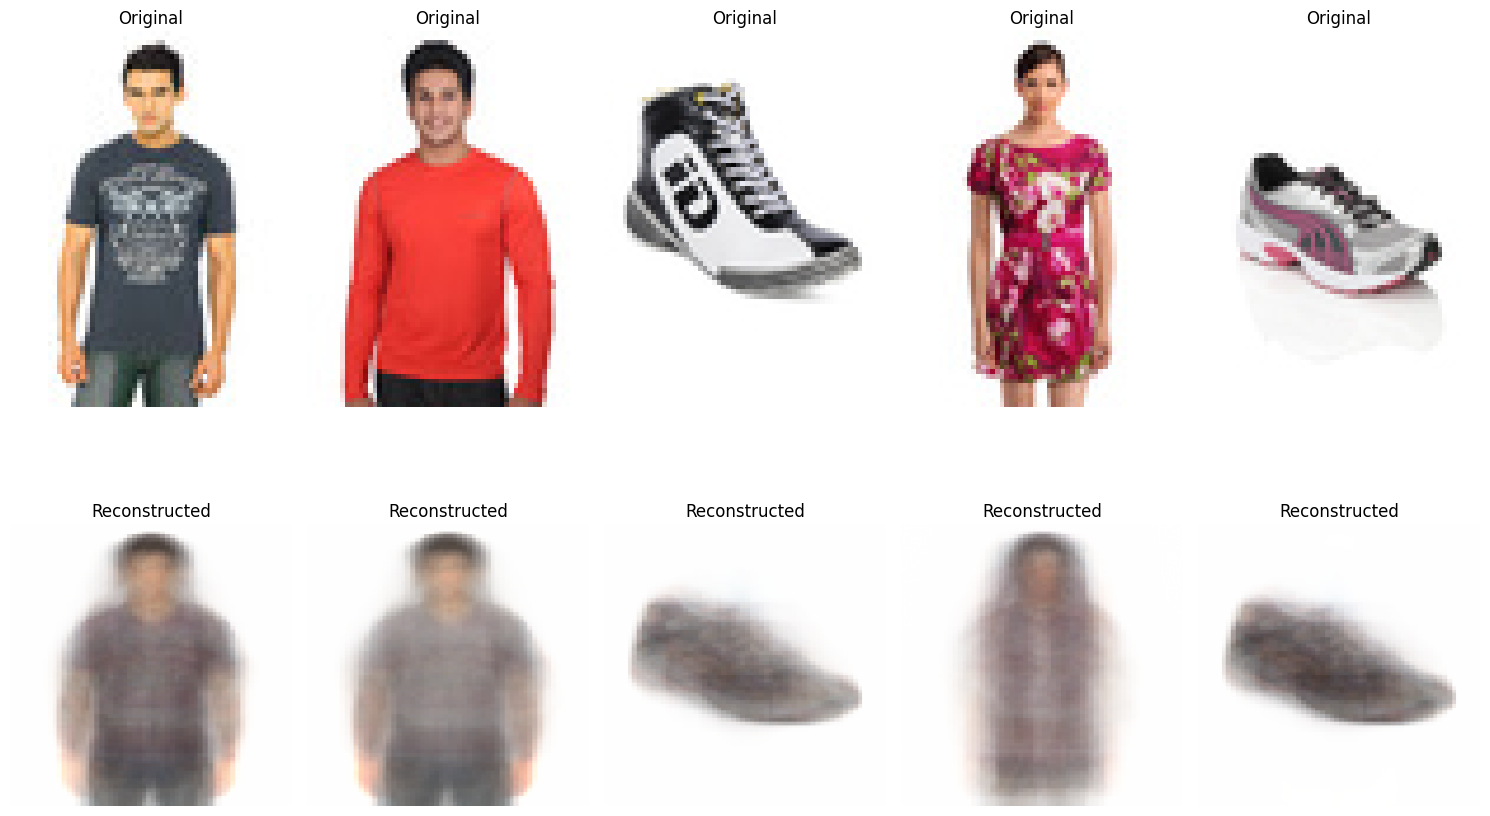

In [ ]:
# Visualize predictions for CNN Autoencoder model
print("RestNet Autoencoder Model Predictions:")
visualize_autoencoder_predictions(resnet_autoencoder, test_df, num_images=5)

1/1 [==============================] - 0s 20ms/step


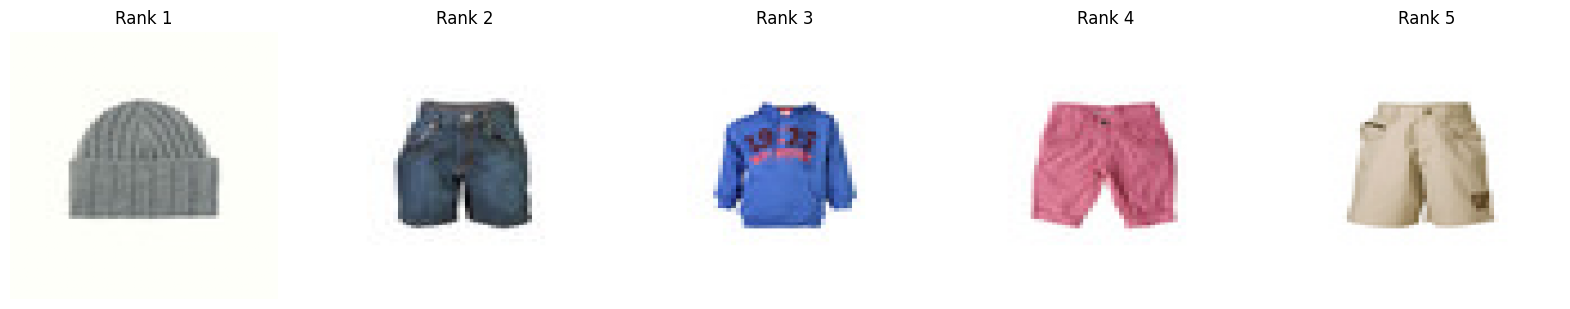

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load a query image
query_image_path = '/content/fashion-product-images-small/images/10001.jpg'
query_image = load_img(query_image_path, target_size=(224, 224))
query_image = img_to_array(query_image) / 255.0

# Load dataset images
dataset_images = np.array([img_to_array(load_img(file, target_size=(224, 224))) / 255.0 for file in test_df['image_path']])

# Ensure dataset_images is a numpy array
dataset_images = np.array(dataset_images)

# Visualize the visual search results
def visualize_visual_search(autoencoder, query_image, dataset_images, num_results=5):
    query_image = np.expand_dims(query_image, axis=0)
    reconstructed_query = autoencoder.predict(query_image)

    # Calculate the similarity (mean squared error) between the reconstructed query and dataset images
    similarities = np.mean((dataset_images - reconstructed_query) ** 2, axis=(1, 2, 3))
    top_indices = np.argsort(similarities)[:num_results]

    plt.figure(figsize=(20, 4))
    for i, idx in enumerate(top_indices):
        ax = plt.subplot(1, num_results, i + 1)
        plt.imshow(dataset_images[idx].reshape(224, 224, 3))
        plt.title(f"Rank {i+1}")
        plt.axis("off")
    plt.show()

# Call the function to visualize the visual search
visualize_visual_search(cnn_autoencoder, query_image, dataset_images)

In [ ]:
# List all files in the directory
image_directory = '/content/fashion-product-images-small/myntradataset/images'
files = os.listdir(image_directory)
print(files)

['29867.jpg', '11125.jpg', '9825.jpg', '33160.jpg', '34401.jpg', '59060.jpg', '6312.jpg', '57407.jpg', '25650.jpg', '19600.jpg', '58307.jpg', '27364.jpg', '56046.jpg', '6553.jpg', '18282.jpg', '25247.jpg', '33699.jpg', '5787.jpg', '52503.jpg', '44749.jpg', '8103.jpg', '45102.jpg', '6830.jpg', '24389.jpg', '31328.jpg', '15006.jpg', '59645.jpg', '3400.jpg', '49518.jpg', '38756.jpg', '34823.jpg', '25932.jpg', '15805.jpg', '40271.jpg', '15191.jpg', '10351.jpg', '4156.jpg', '15718.jpg', '26454.jpg', '28029.jpg', '9524.jpg', '57327.jpg', '37075.jpg', '4518.jpg', '3162.jpg', '46881.jpg', '15861.jpg', '45076.jpg', '17839.jpg', '57889.jpg', '27739.jpg', '43478.jpg', '53417.jpg', '23930.jpg', '58673.jpg', '9567.jpg', '34588.jpg', '56417.jpg', '58820.jpg', '32034.jpg', '43384.jpg', '3816.jpg', '22336.jpg', '11802.jpg', '41469.jpg', '38922.jpg', '4881.jpg', '25393.jpg', '32482.jpg', '48972.jpg', '44182.jpg', '8558.jpg', '8738.jpg', '5728.jpg', '29189.jpg', '19361.jpg', '18895.jpg', '57376.jpg', '3

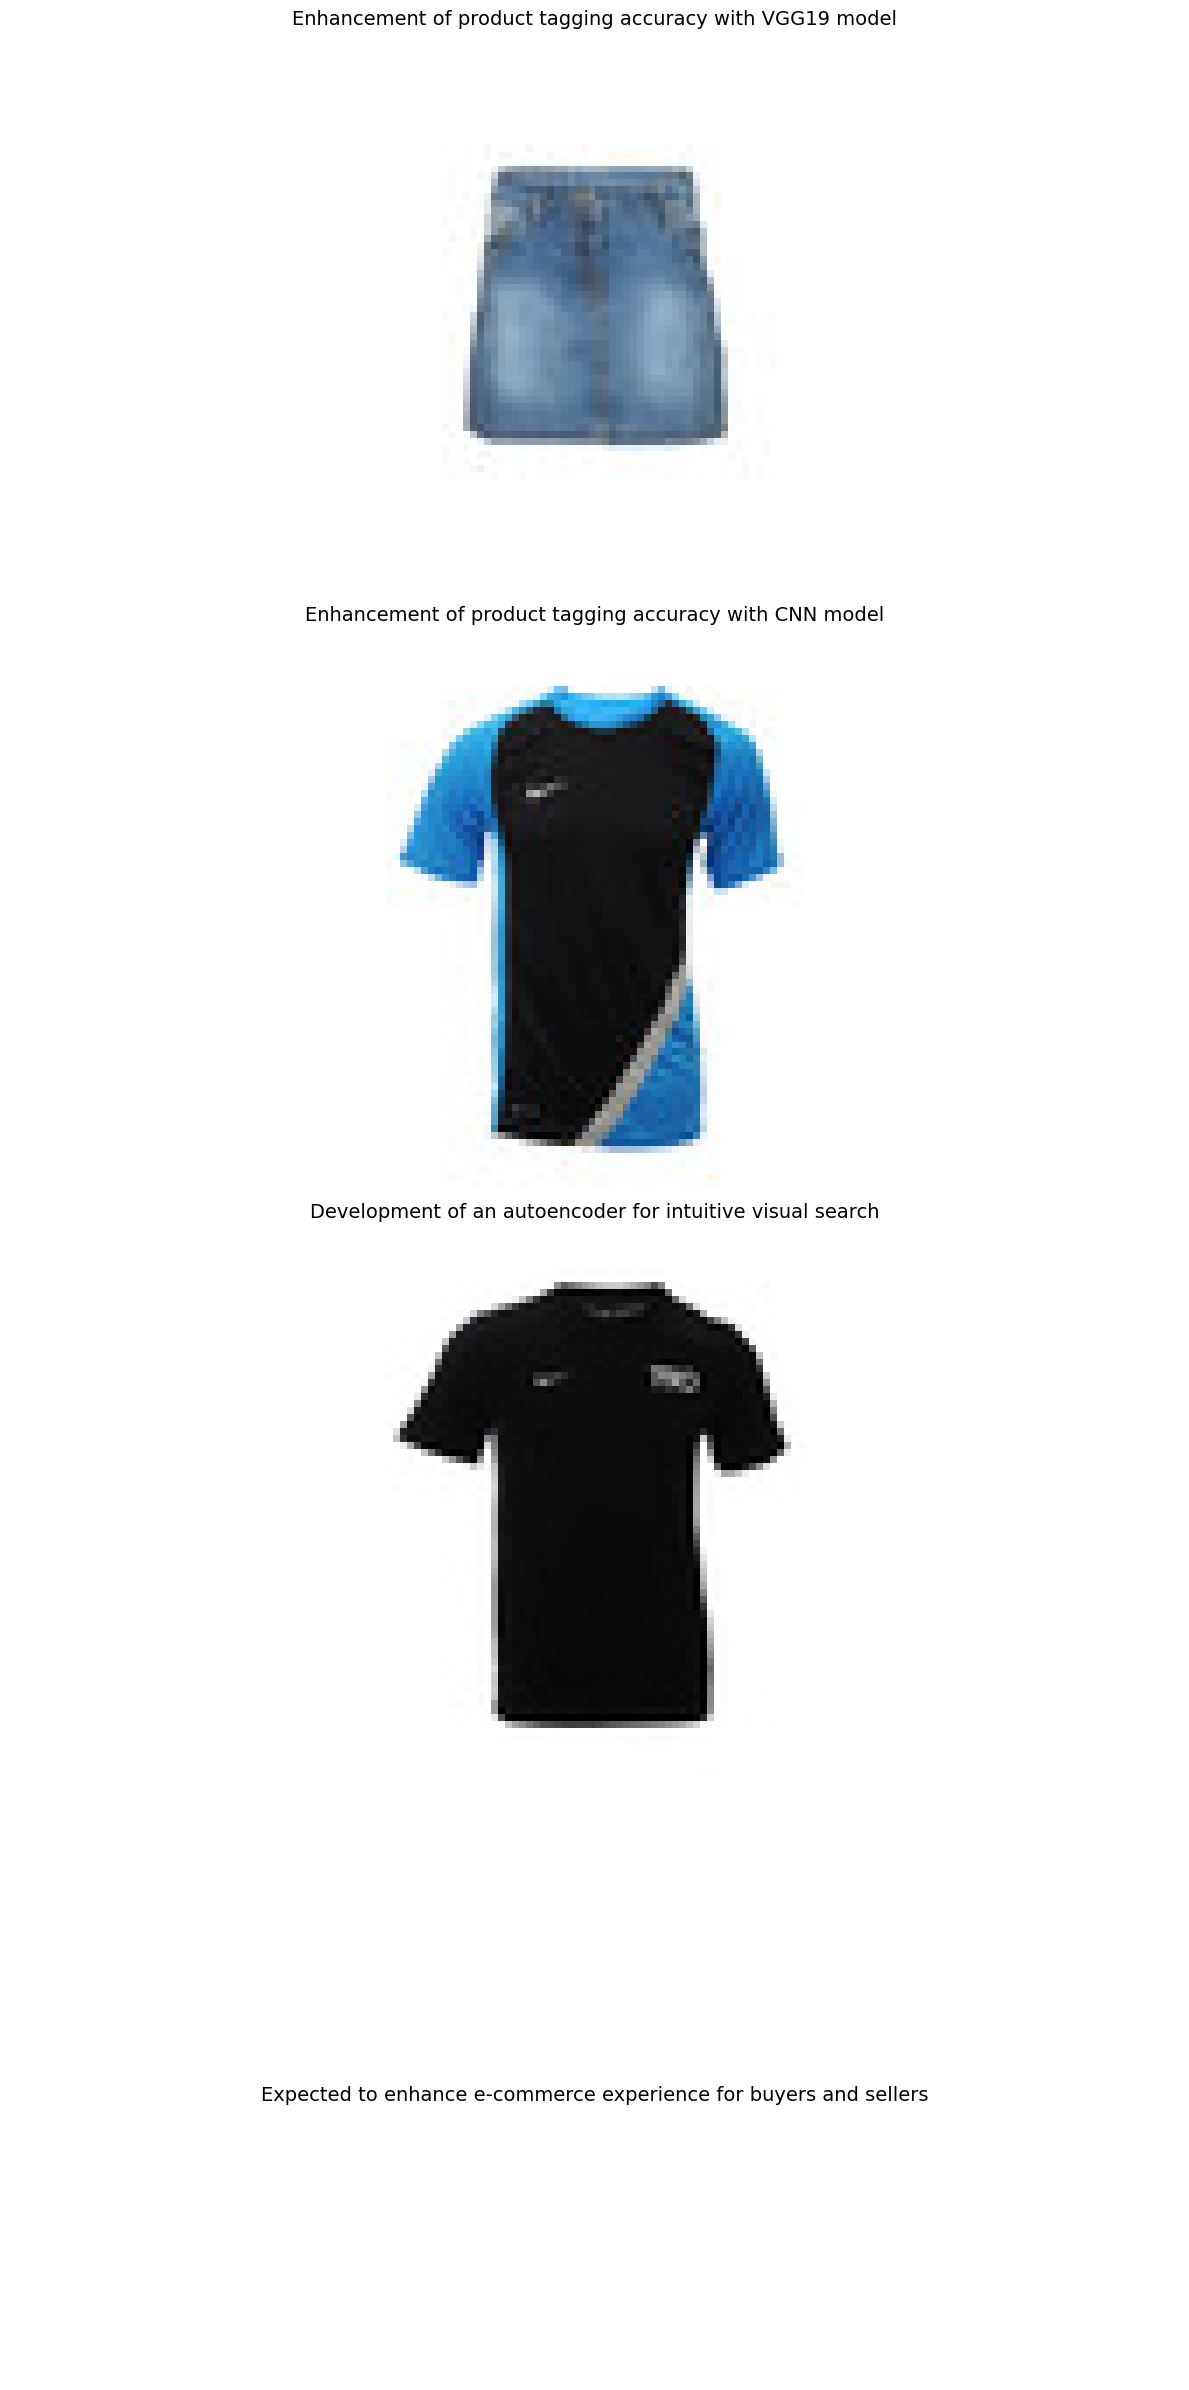

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Define paths to your specific images
vgg_image_path = '/content/fashion-product-images-small/images/10001.jpg'
cnn_image_path = '/content/fashion-product-images-small/myntradataset/images/10005.jpg'
autoencoder_image_path = '/content/fashion-product-images-small/myntradataset/images/10006.jpg'

# Load images
vgg_image = Image.open(vgg_image_path)
cnn_image = Image.open(cnn_image_path)
autoencoder_image = Image.open(autoencoder_image_path)

# Create a visual summary of the research goals and expected outcomes
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

# VGG19 model goal
axs[0].imshow(vgg_image)
axs[0].axis('off')
axs[0].set_title('Enhancement of product tagging accuracy with VGG19 model', fontsize=14)

# CNN model goal
axs[1].imshow(cnn_image)
axs[1].axis('off')
axs[1].set_title('Enhancement of product tagging accuracy with CNN model', fontsize=14)

# Autoencoder development goal
axs[2].imshow(autoencoder_image)
axs[2].axis('off')
axs[2].set_title('Development of an autoencoder for intuitive visual search', fontsize=14)

# Expected outcome
axs[3].text(0.5, 0.5, "Expected to enhance e-commerce experience for buyers and sellers", fontsize=14, ha='center')
axs[3].axis('off')

plt.tight_layout()
plt.show()

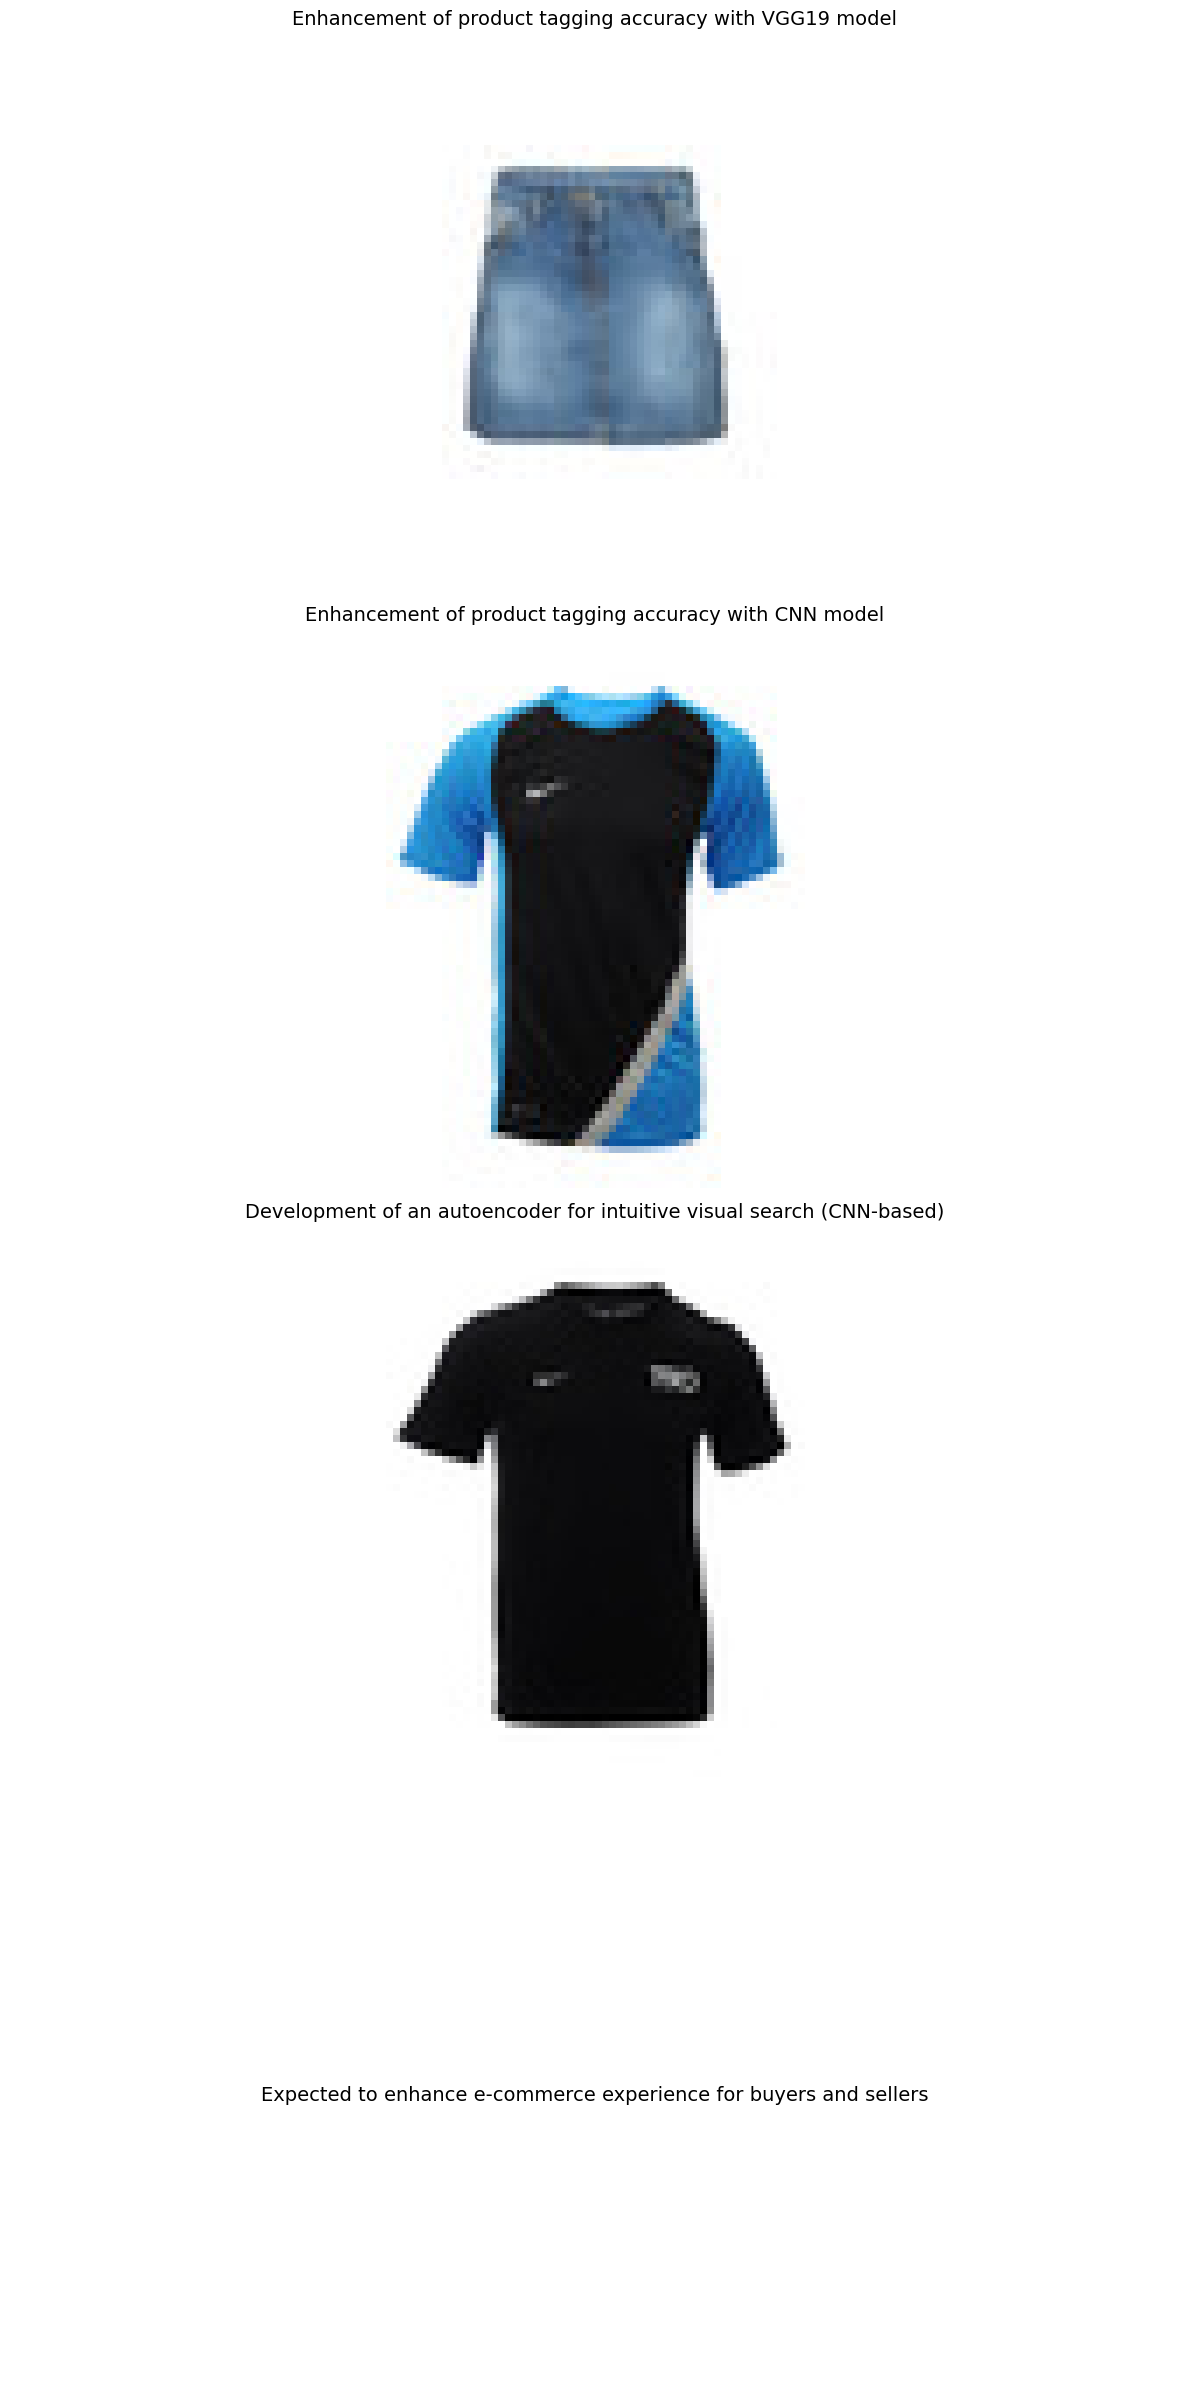

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Define paths to your specific images
vgg_image_path = '/content/fashion-product-images-small/images/10001.jpg'
cnn_image_path = '/content/fashion-product-images-small/myntradataset/images/10005.jpg'
autoencoder_image_path = '/content/fashion-product-images-small/myntradataset/images/10006.jpg'

# Load images
vgg_image = Image.open(vgg_image_path)
cnn_image = Image.open(cnn_image_path)
autoencoder_image = Image.open(autoencoder_image_path)

# Create a visual summary of the research goals and expected outcomes
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

# VGG19 model goal
axs[0].imshow(vgg_image)
axs[0].axis('off')
axs[0].set_title('Enhancement of product tagging accuracy with VGG19 model', fontsize=14)

# CNN model goal
axs[1].imshow(cnn_image)
axs[1].axis('off')
axs[1].set_title('Enhancement of product tagging accuracy with CNN model', fontsize=14)

# Autoencoder development goal (CNN-based)
axs[2].imshow(autoencoder_image)
axs[2].axis('off')
axs[2].set_title('Development of an autoencoder for intuitive visual search (CNN-based)', fontsize=14)

# Expected outcome
axs[3].text(0.5, 0.5, "Expected to enhance e-commerce experience for buyers and sellers", fontsize=14, ha='center')
axs[3].axis('off')

plt.tight_layout()
plt.show()

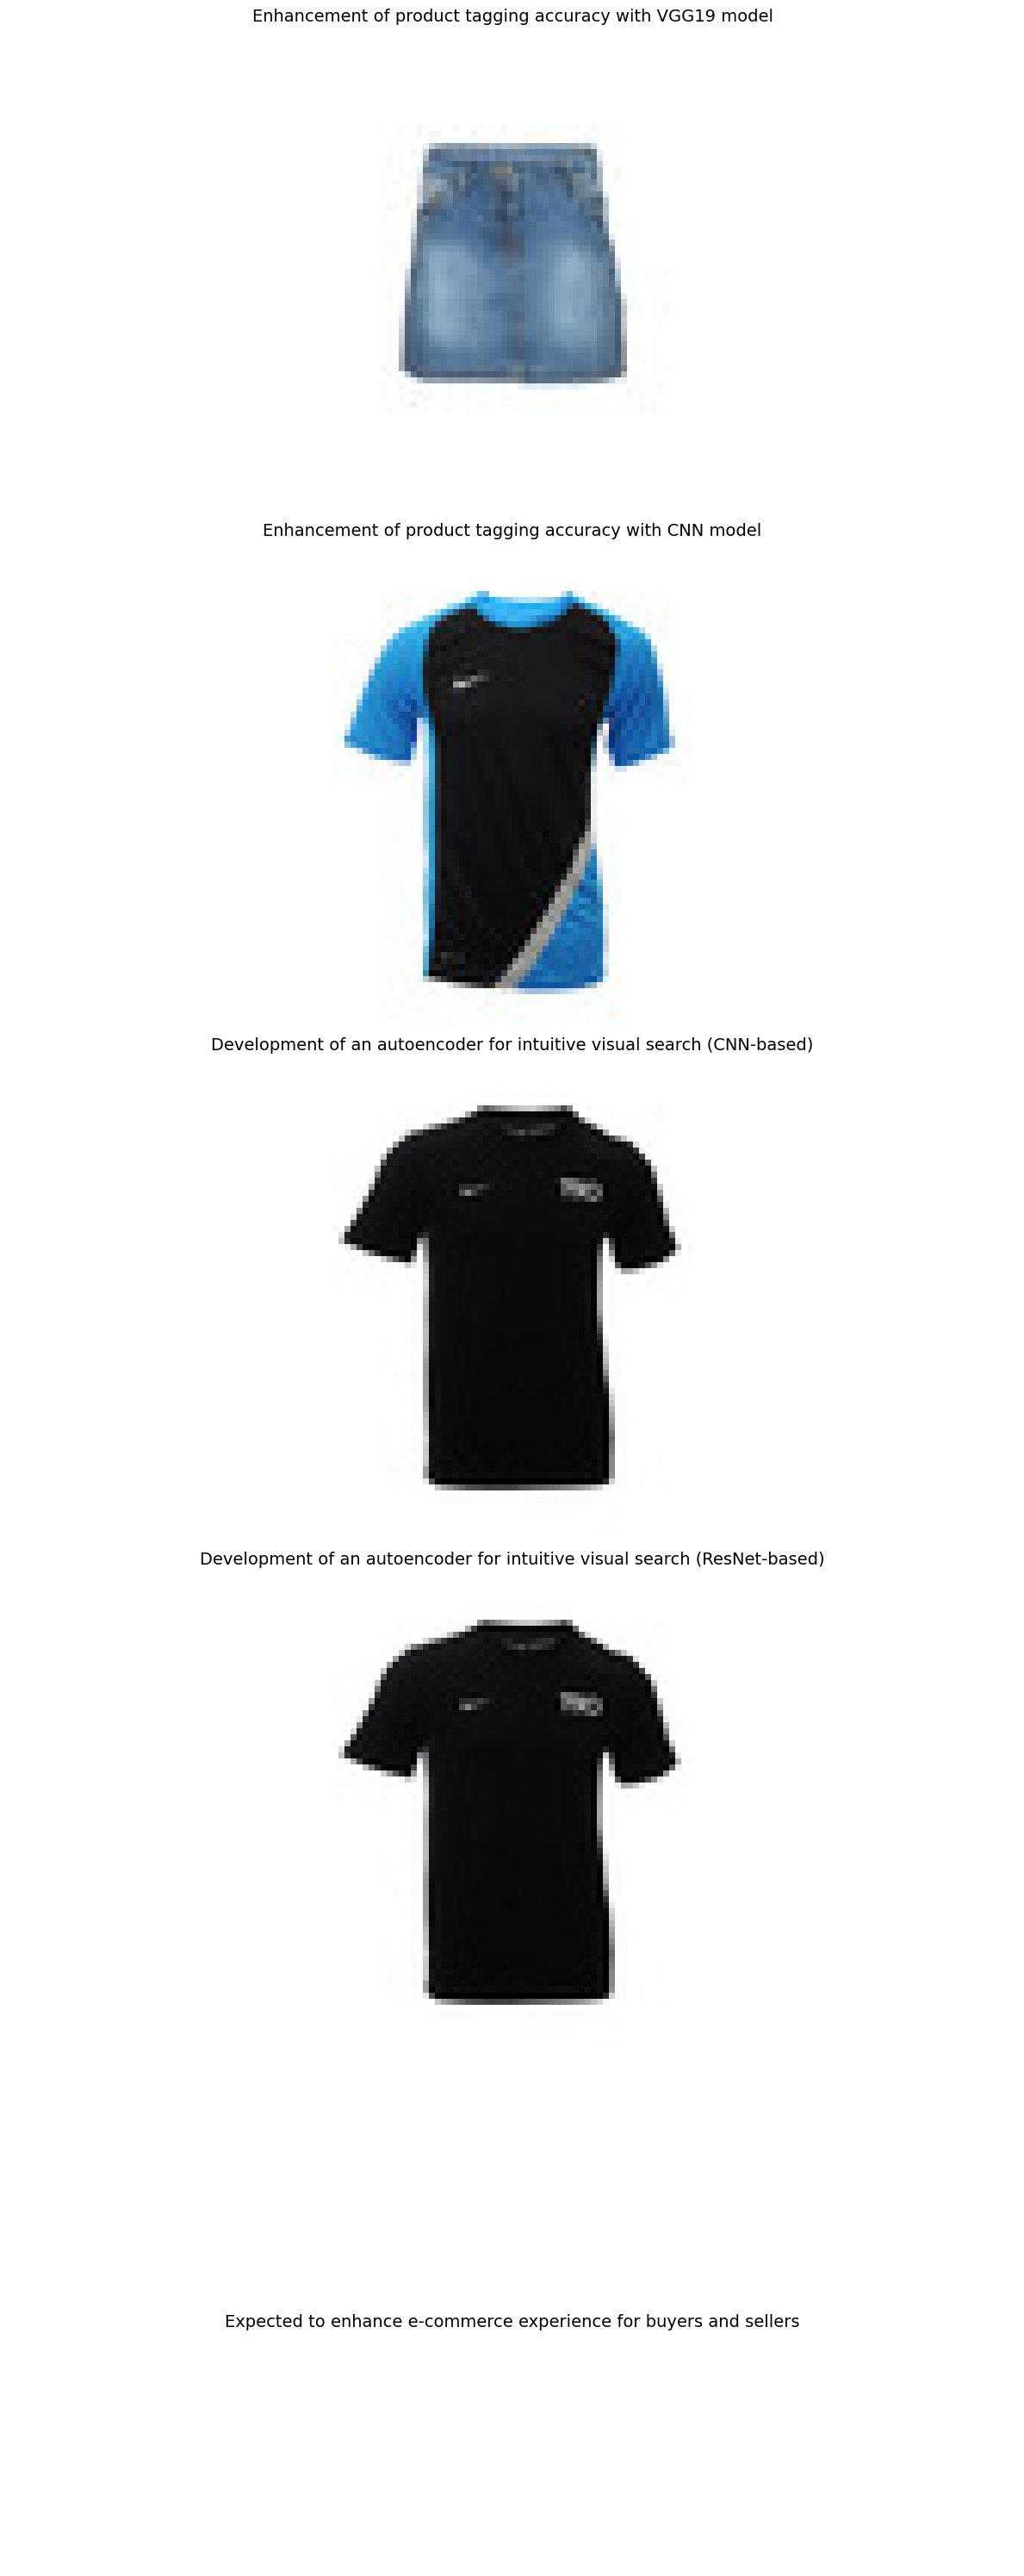

In [ ]:
# Create a visual summary of the research goals and expected outcomes
fig, axs = plt.subplots(5, 1, figsize=(12, 30))

# VGG19 model goal
axs[0].imshow(vgg_image)
axs[0].axis('off')
axs[0].set_title('Enhancement of product tagging accuracy with VGG19 model', fontsize=14)

# CNN model goal
axs[1].imshow(cnn_image)
axs[1].axis('off')
axs[1].set_title('Enhancement of product tagging accuracy with CNN model', fontsize=14)

# Autoencoder development goal (CNN-based)
axs[2].imshow(autoencoder_image)
axs[2].axis('off')
axs[2].set_title('Development of an autoencoder for intuitive visual search (CNN-based)', fontsize=14)

# Autoencoder development goal (ResNet-based)
axs[3].imshow(autoencoder_image)
axs[3].axis('off')
axs[3].set_title('Development of an autoencoder for intuitive visual search (ResNet-based)', fontsize=14)

# Expected outcome
axs[4].text(0.5, 0.5, "Expected to enhance e-commerce experience for buyers and sellers", fontsize=14, ha='center')
axs[4].axis('off')

plt.tight_layout()
plt.show()

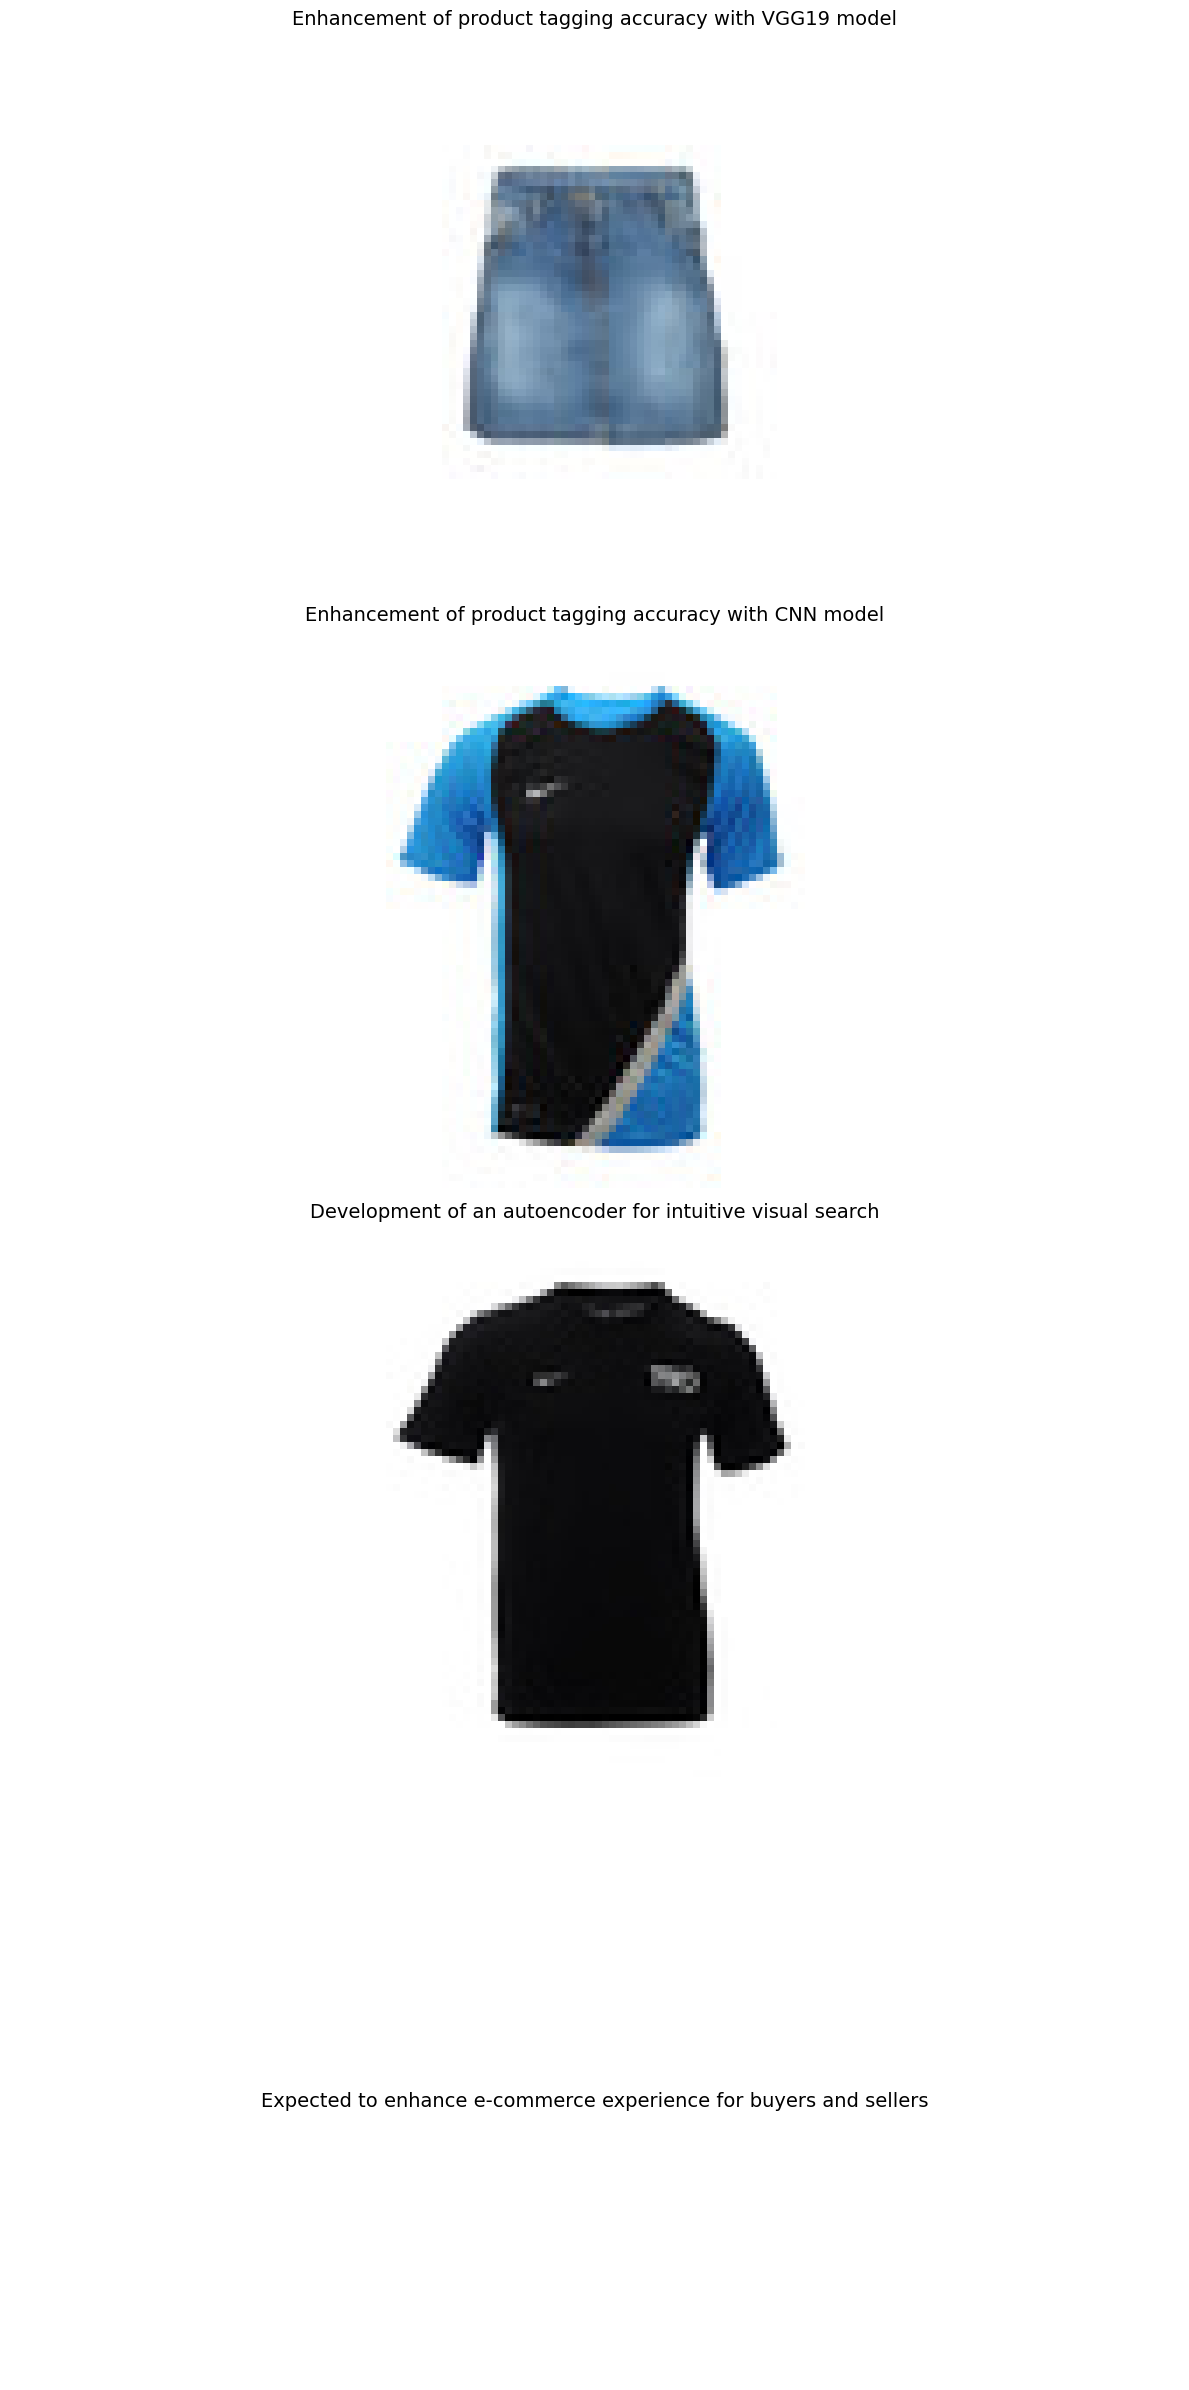

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Define paths to your specific images
vgg_image_path = '/content/fashion-product-images-small/images/10001.jpg'
cnn_image_path = '/content/fashion-product-images-small/myntradataset/images/10005.jpg'
autoencoder_image_path = '/content/fashion-product-images-small/myntradataset/images/10006.jpg'

# Load images
vgg_image = Image.open(vgg_image_path)
cnn_image = Image.open(cnn_image_path)
autoencoder_image = Image.open(autoencoder_image_path)

# Create a visual summary of the research goals and expected outcomes
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

# VGG19 model goal
axs[0].imshow(vgg_image)
axs[0].axis('off')
axs[0].set_title('Enhancement of product tagging accuracy with VGG19 model', fontsize=14)

# CNN model goal
axs[1].imshow(cnn_image)
axs[1].axis('off')
axs[1].set_title('Enhancement of product tagging accuracy with CNN model', fontsize=14)

# Autoencoder development goal
axs[2].imshow(autoencoder_image)
axs[2].axis('off')
axs[2].set_title('Development of an autoencoder for intuitive visual search', fontsize=14)

# Expected outcome (text only)
axs[3].text(0.5, 0.5, "Expected to enhance e-commerce experience for buyers and sellers", fontsize=14, ha='center', va='center')
axs[3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics.pairwise import cosine_similarity

# Define function to load and preprocess images
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

# Function to extract features using the encoder part of the autoencoder
def extract_features(model, image_path):
    img = load_and_preprocess_image(image_path)
    features = model.predict(img)
    return features

# Load the autoencoder model
autoencoder = cnn_autoencoder

# Extract the encoder part from the autoencoder
# Replace 'conv2d_5' with the actual encoder layer name identified from the summary
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('conv2d_5').output)

# Path to the query image
query_image_path = '/content/fashion-product-images-small/images/10001.jpg'

# Path to the dataset images
dataset_images_folder = '/content/fashion-product-images-small/myntradataset/images'

# Extract features for the query image
query_features = extract_features(encoder, query_image_path)

# Extract features for all dataset images
dataset_features = []
dataset_image_paths = []
for image_name in os.listdir(dataset_images_folder):
    image_path = os.path.join(dataset_images_folder, image_name)
    features = extract_features(encoder, image_path)
    dataset_features.append(features)
    dataset_image_paths.append(image_path)

# Compute similarities
similarities = cosine_similarity(query_features.reshape(1, -1), np.vstack(dataset_features).reshape(len(dataset_features), -1))

# Sort images based on similarity
sorted_indices = np.argsort(similarities[0])[::-1]
sorted_image_paths = [dataset_image_paths[i] for i in sorted_indices[:5]]  # Get top 5 similar images

# Display query image and top 5 similar images
fig, axs = plt.subplots(1, 6, figsize=(20, 5))

# Display query image
query_image = Image.open(query_image_path)
axs[0].imshow(query_image)
axs[0].axis('off')
axs[0].set_title('Query Image')

# Display top 5 similar images
for i, image_path in enumerate(sorted_image_paths):
    similar_image = Image.open(image_path)
    axs[i + 1].imshow(similar_image)
    axs[i + 1].axis('off')
    axs[i + 1].set_title(f'Rank {i + 1}')

plt.tight_layout()
plt.show()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 13s 13s/step


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics.pairwise import cosine_similarity

# Define function to load and preprocess images
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

# Function to extract features using the encoder part of the autoencoder
def extract_features(model, image_path):
    img = load_and_preprocess_image(image_path)
    features = model.predict(img)
    return features

# Load the autoencoder model
autoencoder = restnet_autoencoder

# Extract the encoder part from the autoencoder
# Replace 'conv2d_5' with the actual encoder layer name identified from the summary
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('conv2d_5').output)

# Path to the query image
query_image_path = '/content/fashion-product-images-small/images/10001.jpg'

# Path to the dataset images
dataset_images_folder = '/content/fashion-product-images-small/myntradataset/images'

# Extract features for the query image
query_features = extract_features(encoder, query_image_path)

# Extract features for all dataset images
dataset_features = []
dataset_image_paths = []
for image_name in os.listdir(dataset_images_folder):
    image_path = os.path.join(dataset_images_folder, image_name)
    features = extract_features(encoder, image_path)
    dataset_features.append(features)
    dataset_image_paths.append(image_path)

# Compute similarities
similarities = cosine_similarity(query_features.reshape(1, -1), np.vstack(dataset_features).reshape(len(dataset_features), -1))

# Sort images based on similarity
sorted_indices = np.argsort(similarities[0])[::-1]
sorted_image_paths = [dataset_image_paths[i] for i in sorted_indices[:5]]  # Get top 5 similar images

# Display query image and top 5 similar images
fig, axs = plt.subplots(1, 6, figsize=(20, 5))

# Display query image
query_image = Image.open(query_image_path)
axs[0].imshow(query_image)
axs[0].axis('off')
axs[0].set_title('Query Image')

# Display top 5 similar images
for i, image_path in enumerate(sorted_image_paths):
    similar_image = Image.open(image_path)
    axs[i + 1].imshow(similar_image)
    axs[i + 1].axis('off')
    axs[i + 1].set_title(f'Rank {i + 1}')

plt.tight_layout()
plt.show()
